# Prediction of Attrition in IBM with Artificial Intelligence

In this project, I will be analysing employee data from IBM and applying machine learning techniques on the dataset. I will determine if an employee's attrition can be predicted using other attributes of an employee.

### Data Source
`WA_Fn-UseC_-HR-Employee-Attrition.csv` was obtained from Kaggle

## Scope of Project

### Data

The project contains a dataset provided by Kaggle called WA_Fn-UseC_-HR-Employee-Attrition.csv. In the dataset, each row represents an IBM employee and the columns are the attributes of the employee. The analysis of the data is crucial so that we can uncover potential reasons for IBM's employee attrition and how can it take steps to retain its manpower.

### Analysis

We will use descriptive statistics and data visualisation techniques to understand the distribution, count, and relationship between attributes. As we want to predict whether an employee will leave IBM based on the employee's other attributes, we will be implementing classification algorithms from the supervised learning family of models.

### Evalulation of Model

We will then conclude the project with the evaluation of the machine learning model selected with a validation dataset. The output of the predictions will be checked using a confusion matrix, metrics such as accuracy, precision, recall, and F1 scores.

### Importing Modules, Loading Data and Glossing Through the Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# read in csv to form a dataframe
employees = pd.read_csv('/Users/hanweitat/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv')
# view first few rows of dataset
print(employees.head())
print()
# obtain basic statistics of each column within the dataset
print(employees.describe())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

This dataset is retrieved from Kaggle where it collects data from IBM's employees. We will be using this dataset for analysis in this file.

`employees` has 1470 rows and 26 columns.

Columns in the dataset
- **Age** is the age of an employee
<br>
- **Attrition** is whether an employee has left the company or not (Yes / No)
<br>
- **BusinessTravel** is the frequency of business travel
<br>
- **DailyRate** is the daily rate of the employee
<br>
- **Department** is the department the employee works in
<br>
- **DistanceFromHome** is the distance between the workplace and an employee's home
<br>
- **Education** is the level of education
<br>
- **EducationField** is the field of education
<br>
- **EmployeeCount** is the number of employees
<br>
- **EmployeeNumber** is the identifier of an employee
<br>
- **EnvironmentSatisfaction** is the satisfaction with the work environment
<br>
- **Gender** is the employee's gender
<br>
- **JobInvolvement**, **JobLevel**, **JobRole**, **JobSatisfaction** are metrics that are related to jobs
<br>
- **MaritalStatus** is the marital status of the employee
<br>
- **MonthlyIncome**, **MonthlyRate** concerns the compensation of the employees
<br>
- **NumCompaniesWorked** is the number of companies the employee has worked for
<br>
- **OverTime** is concerned with whether the employee works overtime or not (Yes / No)
<br>
- **PerformanceRating**, **RelationshipSatisfaction**, **WorkLifeBalance** concerns an employee's performance and satisfaction ratings
<br>
- **TotalWorkingYears**, **YearsAtCompany**, **YearsInCurrentRole**, **YearsSinceLastPromotion**, **YearsWithCurrManager** are related to an employee's role and tenure within the company

In [2]:
list(employees.columns)

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

## Exploring the Data

### Feature Selection

Whether the employee leaves IBM or not will be found in the `Attrition' column.

Attributes
- Department
- Age
- Gender
- EnvironmentSatisfaction
- MaritalStatus
- MonthlyIncome
- OverTime
- TotalWorkingYears
- YearsSinceLastPromotion
- Education
- JobSatisfaction
- NumCompaniesWorked
- PercentSalaryHike
- WorkLifeBalance

### `attrition` column

There are two categories present in this column - Yes and No. The majority of the employees surveyed at the time did not leave IBM.

Number of Categories: 2

Categories: ['Yes' 'No']

No     1233
Yes     237
Name: Attrition, dtype: int64

Missing Values: 0



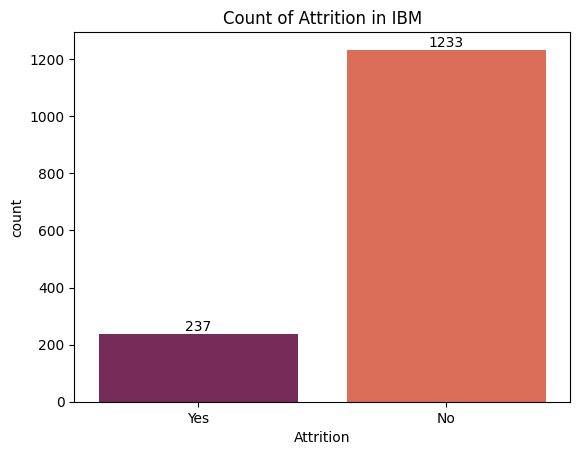

In [3]:
plot = sns.countplot(data=employees, x='Attrition', palette='rocket')
plot.set_title('Count of Attrition in IBM')
for label in plot.containers:
    plot.bar_label(label)
plot.grid(False)
print('Number of Categories:', employees.Attrition.nunique())
print()
print('Categories:', employees.Attrition.unique())
print()
print(employees.Attrition.value_counts())
print()
print('Missing Values:', employees.Attrition.isnull().sum())
print()

### Modifying the labels

0    1233
1     237
Name: Attrition, dtype: int64


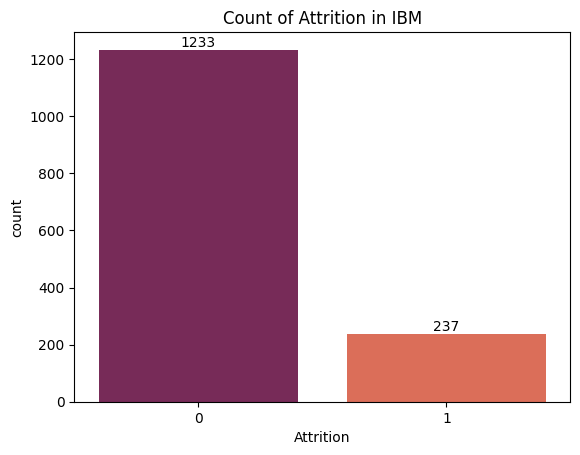

In [4]:
employees['Attrition'] = employees['Attrition'].replace({'Yes': 1, 'No': 0})
print(employees['Attrition'].value_counts())
plot = sns.countplot(data=employees, x='Attrition', palette='rocket')
plot.set_title('Count of Attrition in IBM')
for label in plot.containers:
    plot.bar_label(label)
plot.grid(False)

### Variables

### `Department`

There are 3 departments in the dataset - sales, R&D and HR. The majority of the respondents are from the R&D department, and this is followed by Sales, and then HR.

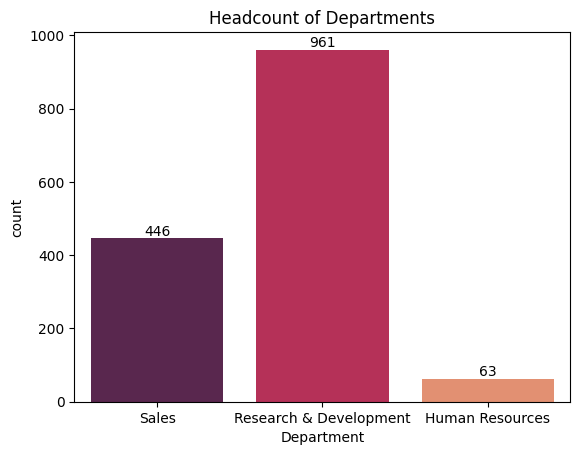

In [5]:
plot = sns.countplot(data=employees, x='Department', palette='rocket')
plot.set_title('Headcount of Departments')
plot.grid(False)
for label in plot.containers:
    plot.bar_label(label)

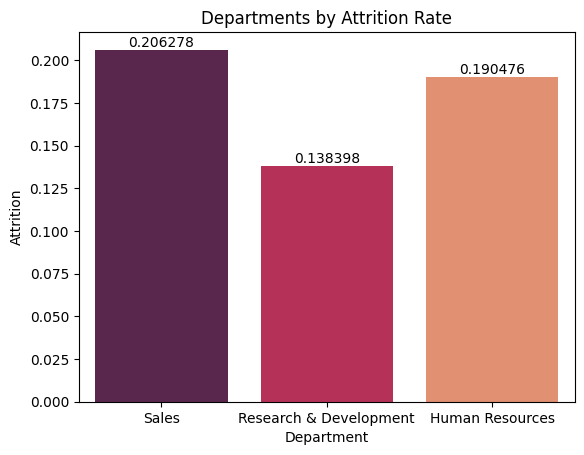

In [6]:
plot = sns.barplot(data=employees, x='Department', y='Attrition', ci=None, palette='rocket')
plot.set_title('Departments by Attrition Rate')
plot.grid(False)
for label in plot.containers:
    plot.bar_label(label)

The sales department has the highest attrition rate, followed by human resources, then the research & development department. Thus IBM might want to look into the issues causing the high attrition rates in the sales department and the human resources department as it might point to existing issues that plague the sales / human resources department that need to be rectified in order to retain its talent.

### `Age`

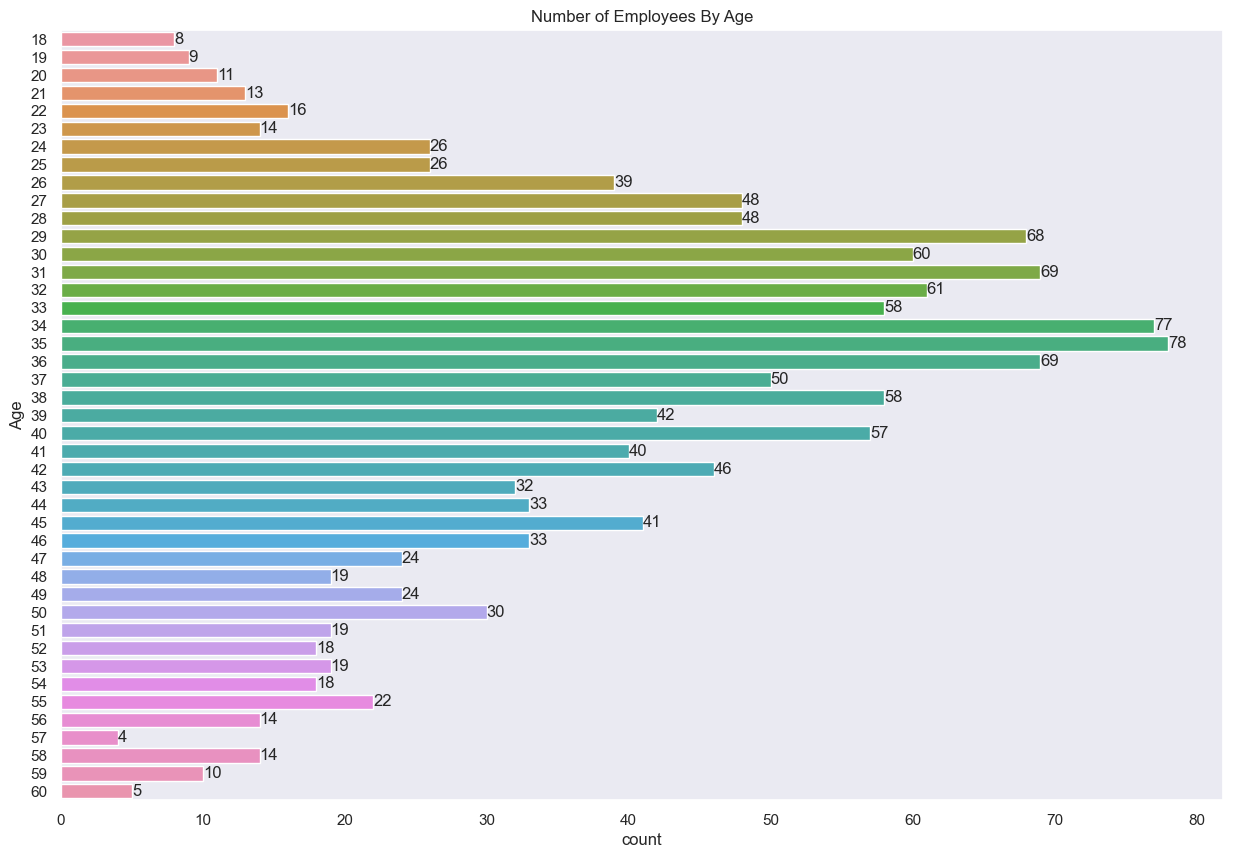

In [7]:
sns.set(rc={'figure.figsize':(15,10)})
plot = sns.countplot(data=employees, y='Age')
plot.grid(False)
plot.set_title('Number of Employees By Age')
for label in plot.containers:
    plot.bar_label(label)

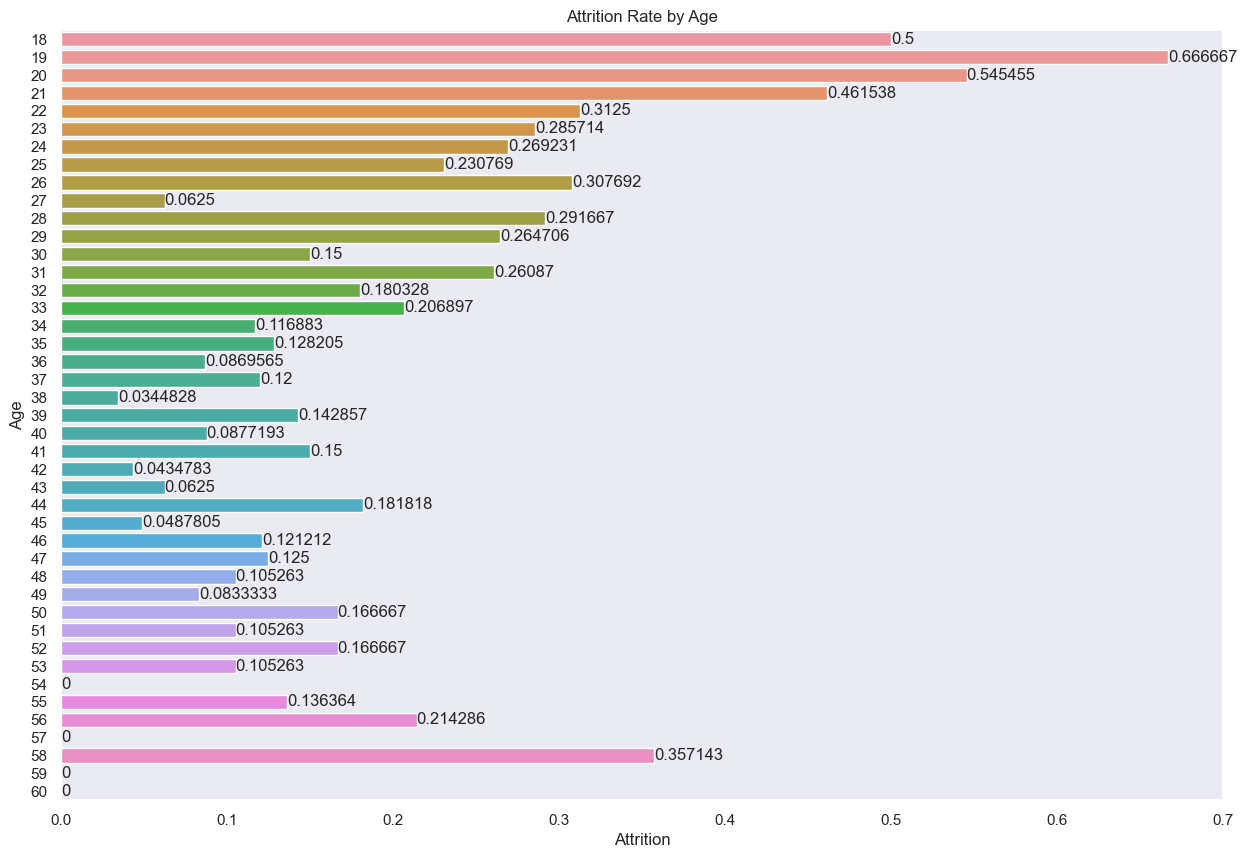

In [8]:
plot = sns.barplot(data=employees, y='Age', x='Attrition', ci=None, orient='h')
plot.set_title('Attrition Rate by Age')
plot.grid(False)
for label in plot.containers:
    plot.bar_label(label)

Based on the plot, we can tell that the attrition rates are generally higher when an employee is young, or when an employee grows older. It is natural for attrition rates to grow as the employees grow older due to retirement. However, the high attrition rates among the younger employees might be a cause for concern as it suggests that there might be some issues that younger (and probably the junior) emoloyees face that causes them to leave IBM or it could be due to changing priorities of the younger employees.

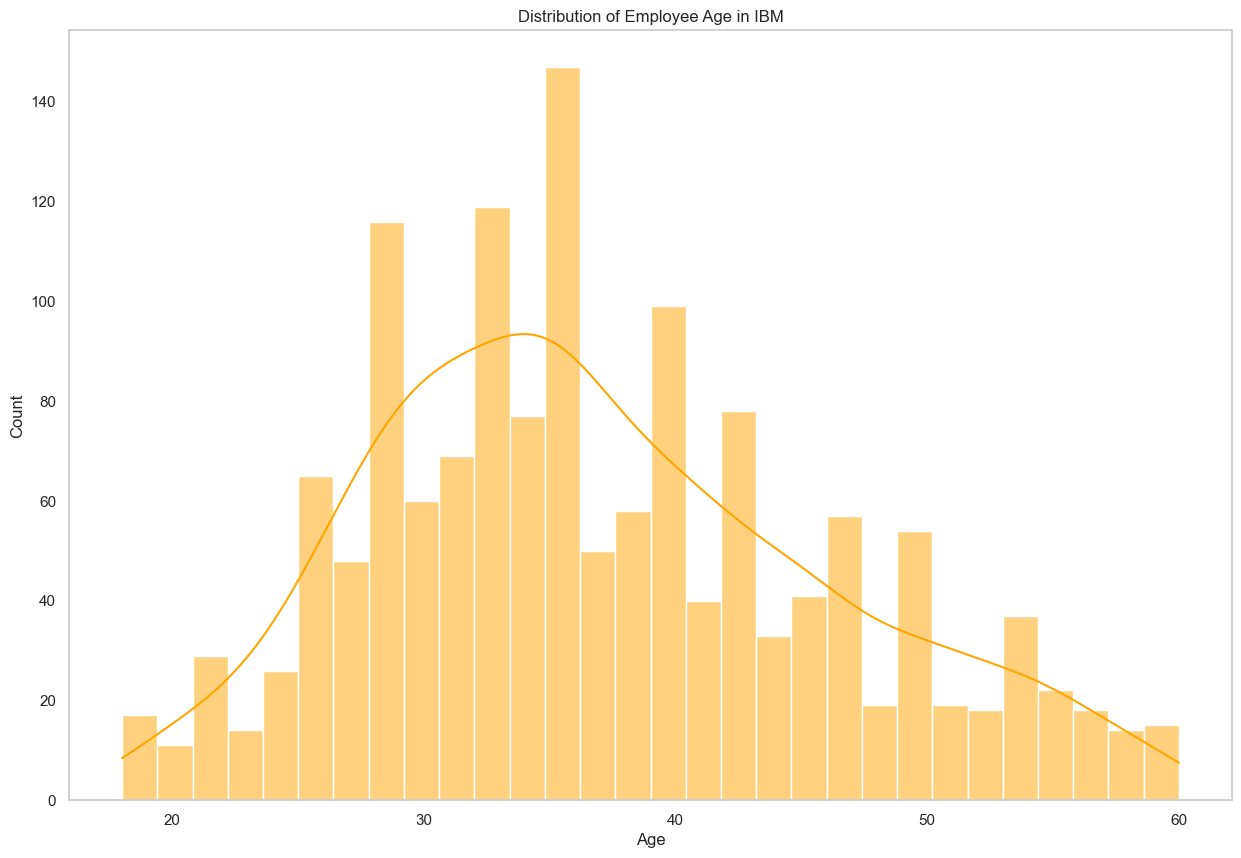

In [9]:
# set the background of each plot
sns.set_style('whitegrid')
sns.color_palette('rocket')
# plot the distribution of age in the dataset
plot = sns.histplot(employees['Age'], bins=30, kde=True, color='orange')
plot.set(title='Distribution of Employee Age in IBM')
plot.grid(False)
# display the plot
plt.show()

Before we commence our analysis of the distribution of age within the company, we shall first obtain additional information about the distribution of age in the dataset.

In [10]:
print('General Statistics')
print(employees['Age'].describe())
print()
print('Skewness of Plot')
print(employees['Age'].skew())

General Statistics
count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

Skewness of Plot
0.4132863018563338


Based on the information presented, we can see that 1470 employees took part in the collection of data.

We can then see that the mean age is 36.923 which would be approximately equal to 37 years old.

There is also a moderate spread among the ages of the employees as the standard deviation is 9.135 years.

The youngest employee surveyed is 18 years old while the oldest employee surveyed is 60 years old.

25% of employees are younger than 30 years old and 25% of employees are older than 43 years old.

The median age is 36 years old - half of the employees are older than 36 years old and half of the employees are younger than 36 years old.

The skewness of the age distribution is 0.413 which indicates that there is a slight right skew of the data - there is a longer tail on the right side of the plot which suggests that there is a small concentration of employees older than the mean age. Overall, the distribution of ages is relatively symmetric. 

The modal age would be 34 years old.

### `Gender`

Most of the employees are male in IBM.

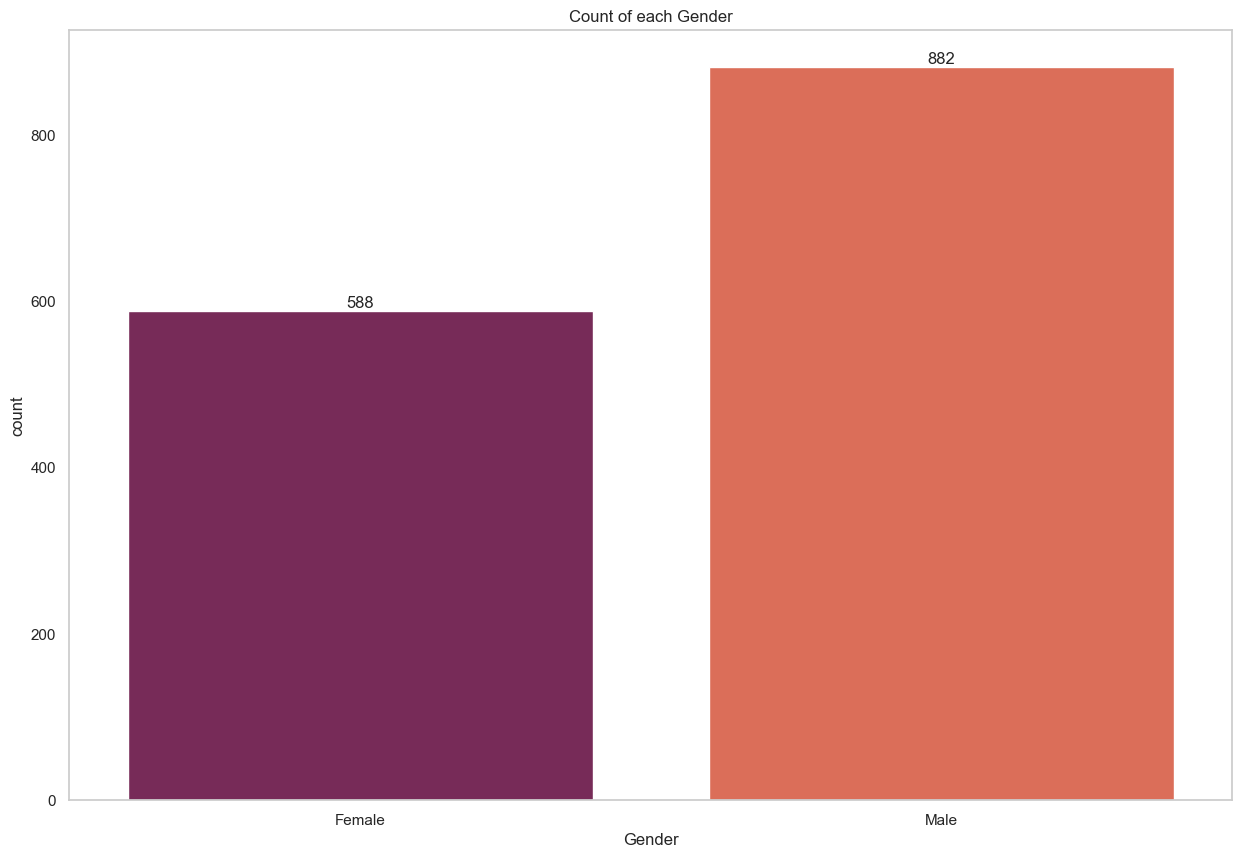

In [11]:
plot = sns.countplot(data=employees, x='Gender', palette='rocket')
plot.grid(False)
plot.set_title('Count of each Gender')
for label in plot.containers:
    plot.bar_label(label)

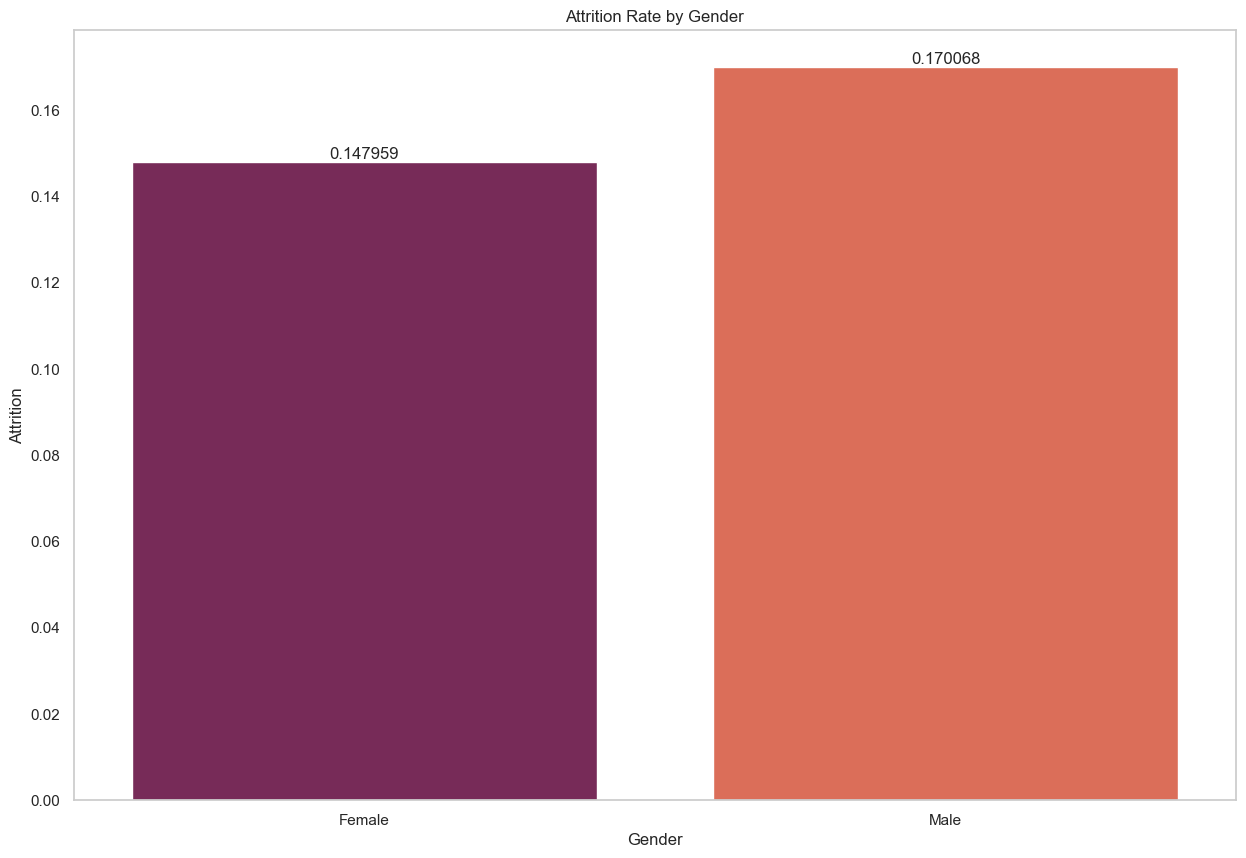

In [12]:
plot = sns.barplot(data=employees, x='Gender', y='Attrition', ci=None, palette='rocket')
plot.set_title('Attrition Rate by Gender')
plot.grid(False)
for label in plot.containers:
    plot.bar_label(label)

Male employees have a higher attrition rate than female employees.

### `EnvironmentSatisfaction`

The data shows that generally, people are more satisfied with their work environment at IBM as shown by the higher frequencies of high ratings of their environmental satisfaction. 

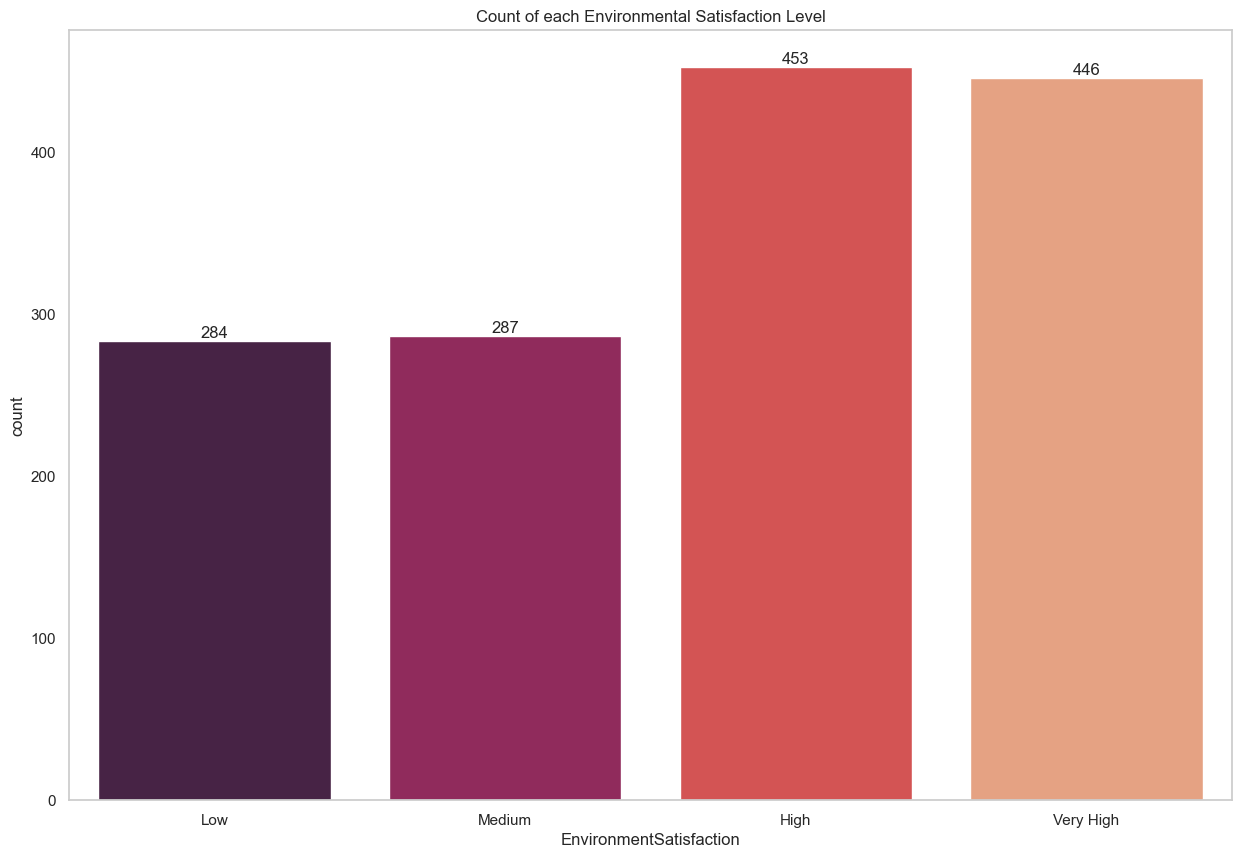

In [13]:
# plot countplot for environmental satisfaction levels
environment_levels = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
employees['EnvironmentSatisfaction'] = employees['EnvironmentSatisfaction'].map(environment_levels)
plot = sns.countplot(x='EnvironmentSatisfaction', palette='rocket', data=employees, order=['Low', 'Medium', 'High', 'Very High'])
plot.grid(False)
plot.set_title('Count of each Environmental Satisfaction Level')
for label in plot.containers:
    plot.bar_label(label)

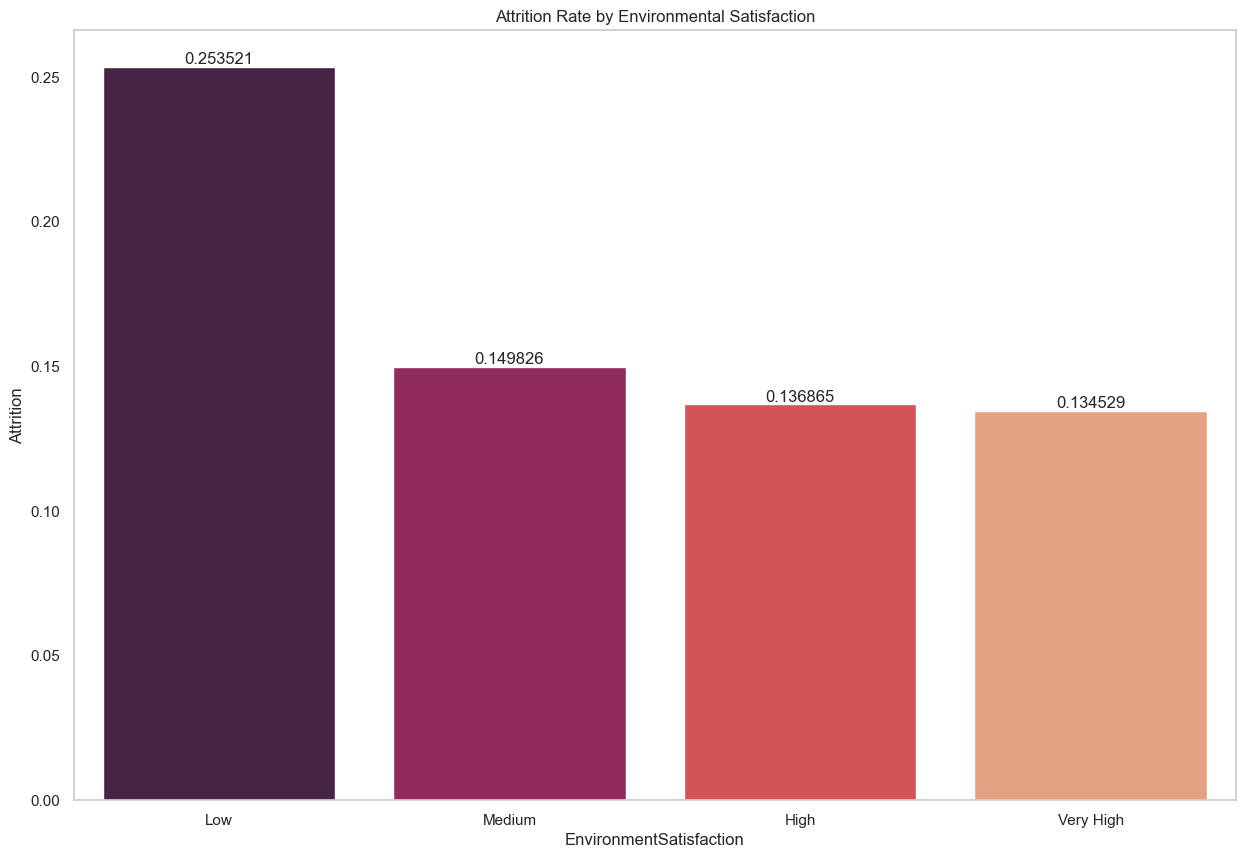

In [14]:
plot = sns.barplot(data=employees, x='EnvironmentSatisfaction', y='Attrition', ci=None, palette='rocket', order=['Low', 'Medium', 'High', 'Very High'])
plot.set_title('Attrition Rate by Environmental Satisfaction')
plot.grid(False)
for label in plot.containers:
    plot.bar_label(label)

The attrition rate of the employees with the lowest environmental satisfaction rates had the highest attrition rates, which would be natural here - IBM might want to look into improving the work environment for these employees especially since the number of employees with a low environment satisfaction rate is significant, and this might be detrimental to IBM's growth.

### `MaritalStatus`

Based on the plot, we can tell that there are the highest counts of married employees in IBM, followed by single employees, then divorced ones.

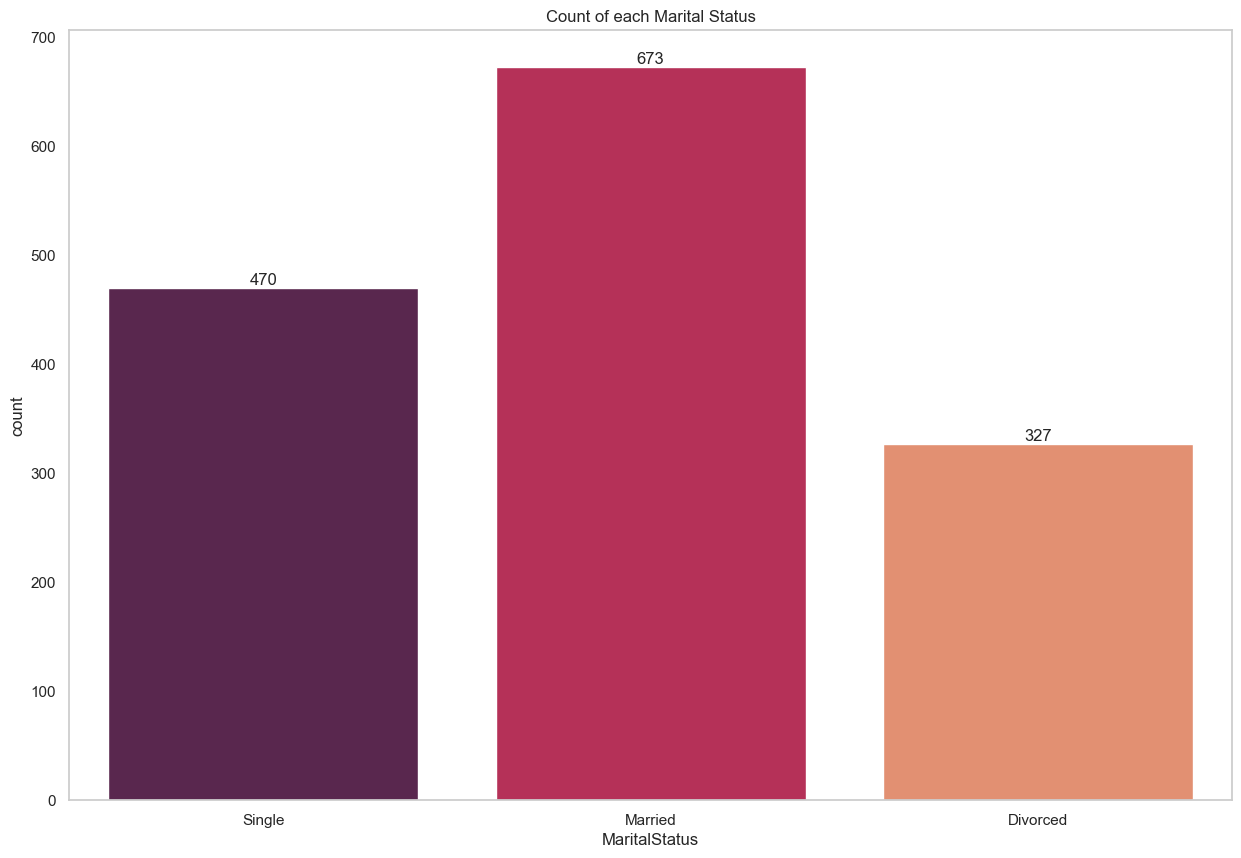

In [15]:
# plot countplot of each marital status
plot = sns.countplot(x='MaritalStatus', palette='rocket', data=employees)
plot.grid(False)
plot.set_title('Count of each Marital Status')
for label in plot.containers:
    plot.bar_label(label)

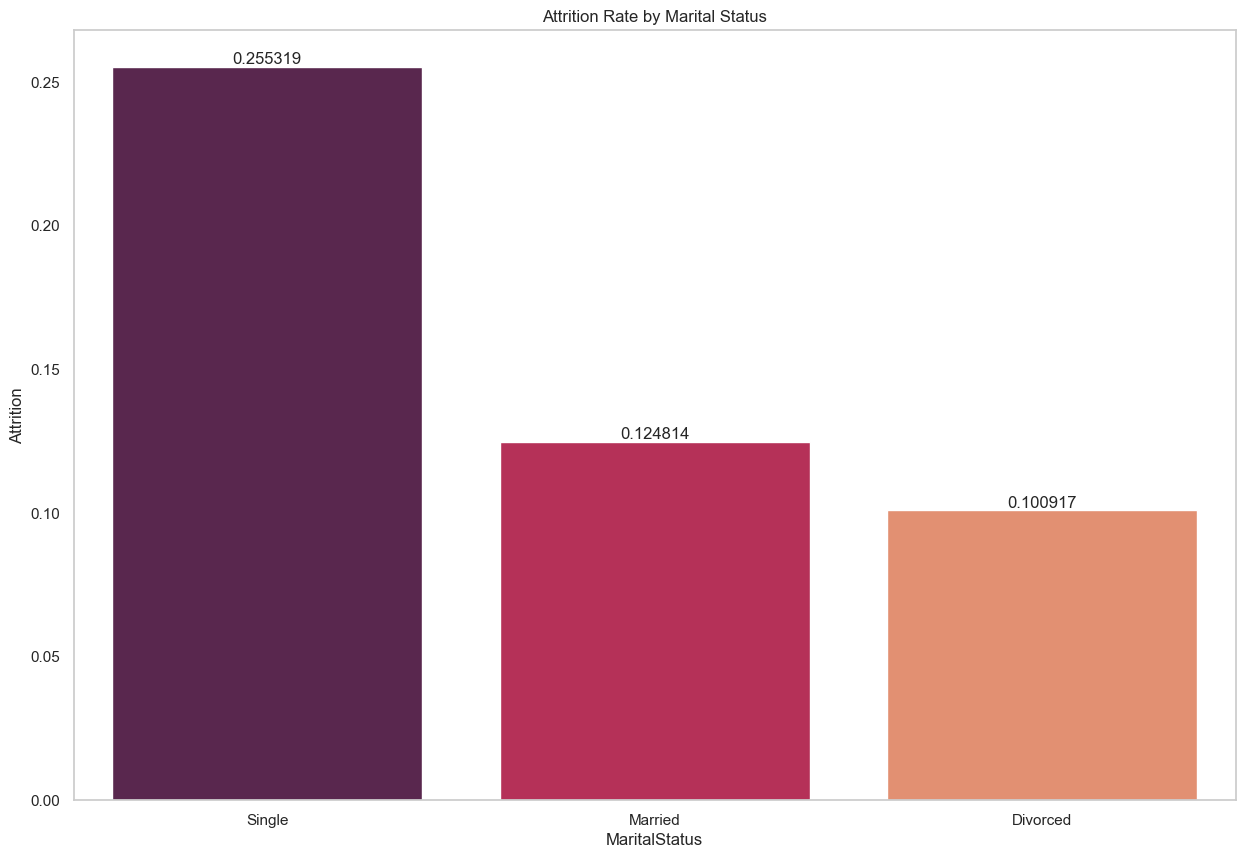

In [16]:
plot = sns.barplot(data=employees, x='MaritalStatus', y='Attrition', ci=None, palette='rocket')
plot.set_title('Attrition Rate by Marital Status')
plot.grid(False)
for label in plot.containers:
    plot.bar_label(label)

The attrition rate among single employees are the highest, followed by those who are married, then those who are divorced. The lower attrition rates for those who are married are natural as many married employees value stability and they likely want to settle down.

### `MonthlyIncome`

The distribution appears to be right-skewed. This indicates that while the majority of employees earn within a lower to mid-range income bracket, there are relatively fewer employees with significantly higher incomes. The peak of the histogram (mode) suggests that the most common monthly income range is on the lower end of the scale. The wide spread of the distribution indicates a large variability in monthly incomes. Employees' salaries vary significantly, which could be due to factors like differences in job roles, experience levels, and departmental functions. The long tail towards the higher end suggests the presence of outliers or employees who earn significantly more than the rest of the workforce. These could be employees in very senior roles, highly specialized positions, or those with substantial tenure. The skewness and spread might reflect the organizational hierarchy and pay scales. A high concentration of employees in lower income ranges could be indicative of many entry-level or mid-level positions. 

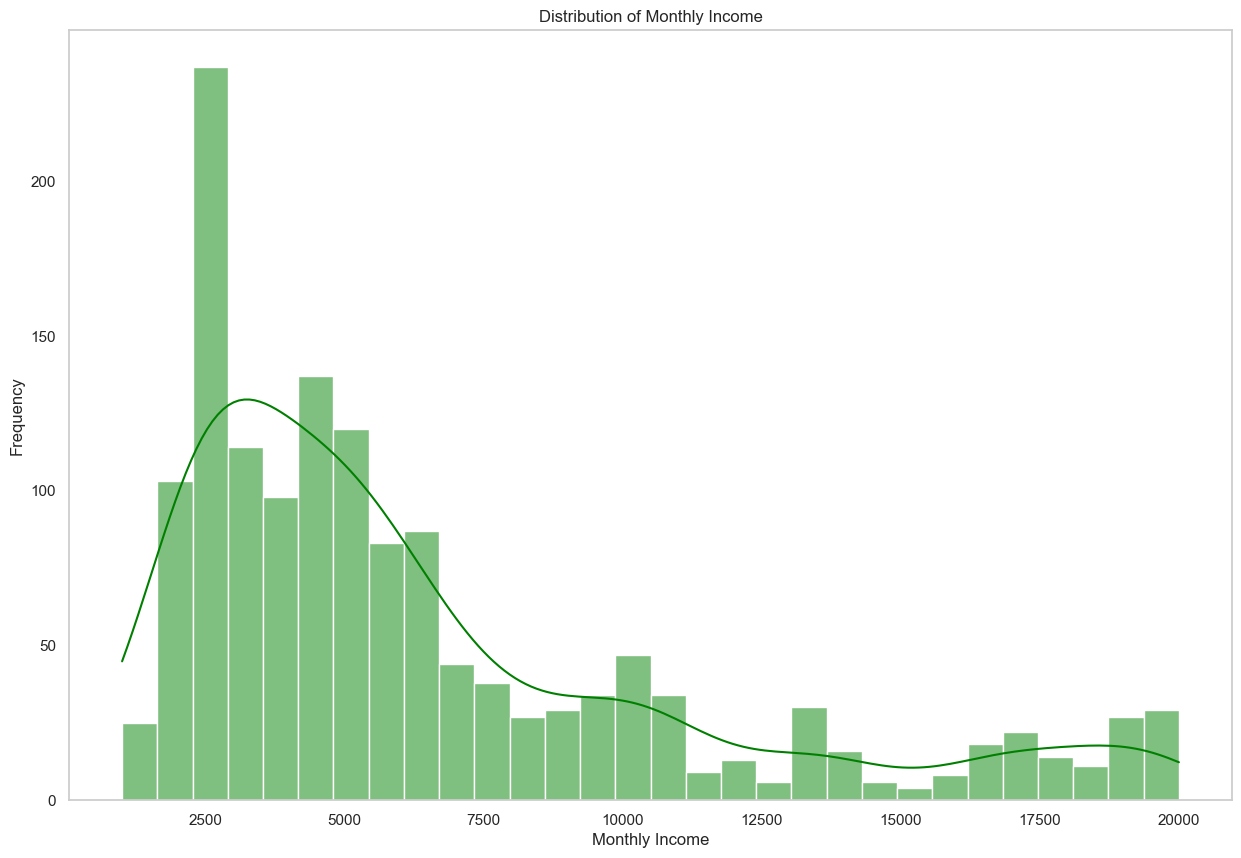

In [17]:
# plot histogram of monthly income
plot = sns.histplot(employees['MonthlyIncome'], bins=30, kde=True, color='green')
plot.grid(False)
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.show()

In [18]:
print('General Statistics')
print(employees['MonthlyIncome'].describe())
print()
print('Skewness of Plot')
print(employees['MonthlyIncome'].skew())

General Statistics
count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

Skewness of Plot
1.3698166808390662


The mean monthly income is $6502.93.

There also exists a large spread in the monthly incomes earned as the standard deviation is approximately $4707.96.

25% of employees earn 2911 or below, and 25% earn 8379 and above.

50% of employees earn 4919 and below and 50% of employees earn 4919 and above.

The lowest monthly income earner in IBM earns 1009 per month while the highest monthly income earner earns 19999. 

The skewness of the plot is 1.37 which would be highly right skewed where there is a high concentration of lower income earners while there are fewer high income earners in IBM.

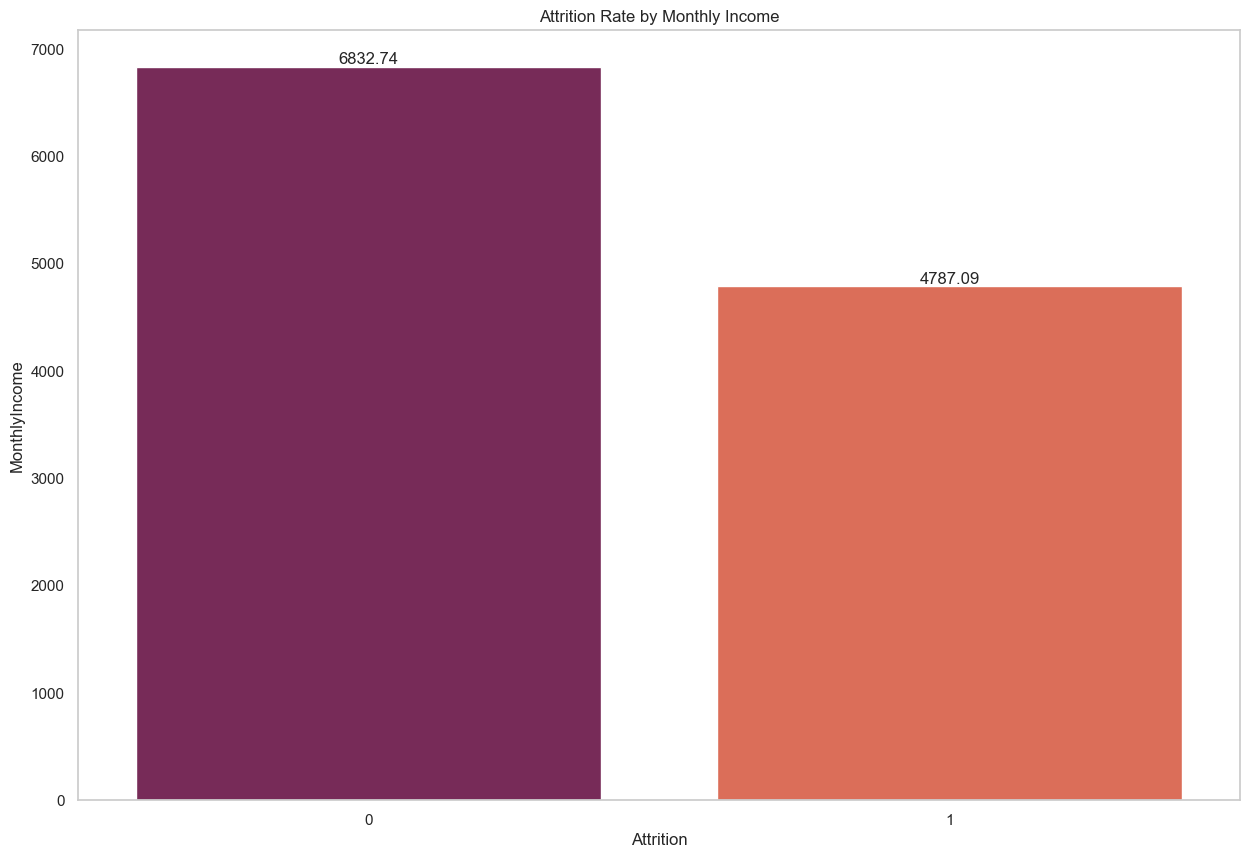

In [19]:
plot = sns.barplot(data=employees, x='Attrition', y='MonthlyIncome', ci=None, palette='rocket')
plot.set_title('Attrition Rate by Monthly Income')
plot.grid(False)
for label in plot.containers:
    plot.bar_label(label)

Employees who command a higher monthly salary are less likely to leave IBM while those who command a lower salary are more likely to leave IBM.

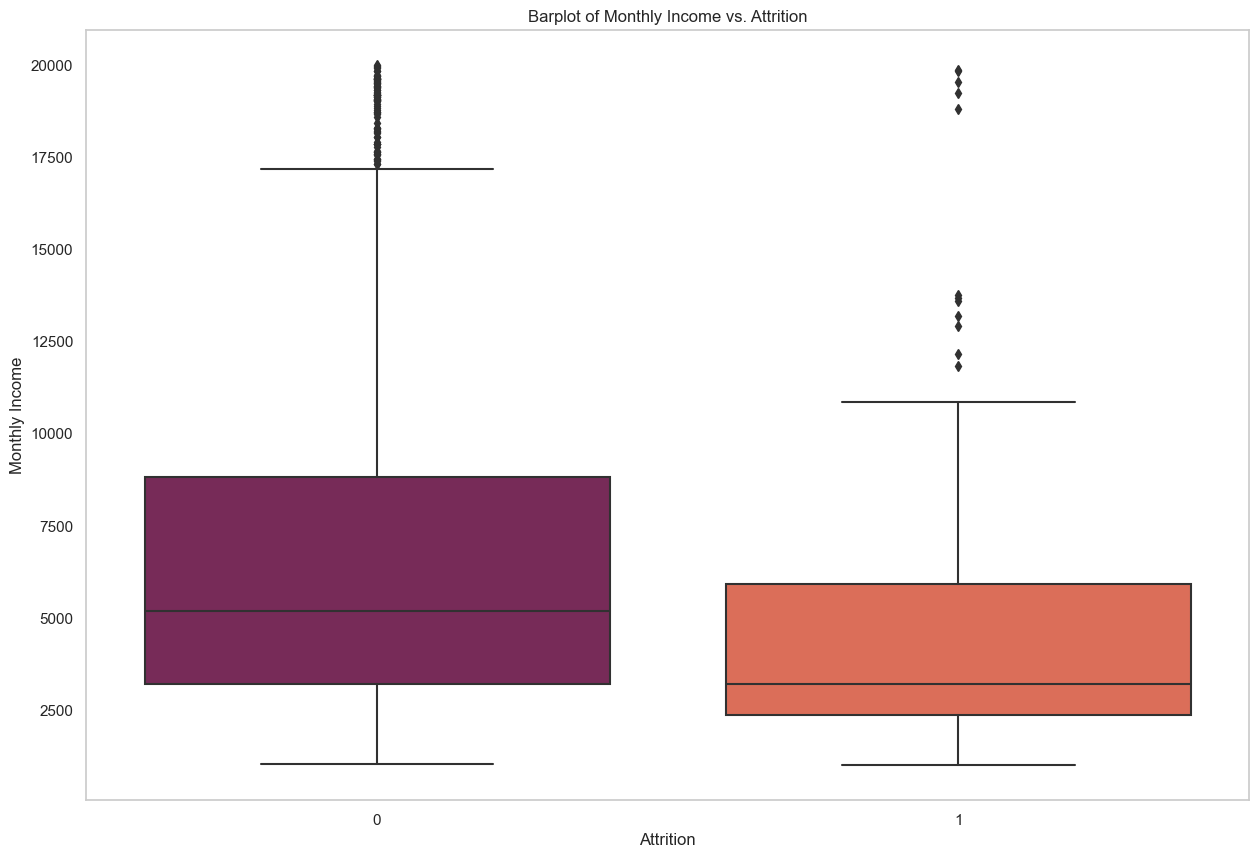

In [20]:
# make a boxplot of monthly income vs attrition
plot = sns.boxplot(x='Attrition', y='MonthlyIncome', data=employees, palette='rocket')
plt.title('Barplot of Monthly Income vs. Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plot.grid(False)
plt.show()

Based on the boxplots above, we can see that employees who command a lower monthly income are more likely to leave IBM as the median, upper, and lower quartiles of the employees who left IBM are lower than that of those who stayed at IBM. This suggests that there might be a correlation between an employee's attrition and their monthly income as employees might seek employment at other companies if the monthly income offered is higher than that of IBM's. This would be crucial to inform IBM about their compensation for employees and how can it be fine tuned to retain more manpower.

### `OverTime`

There are more employees who do overtime work compared to those who do not.

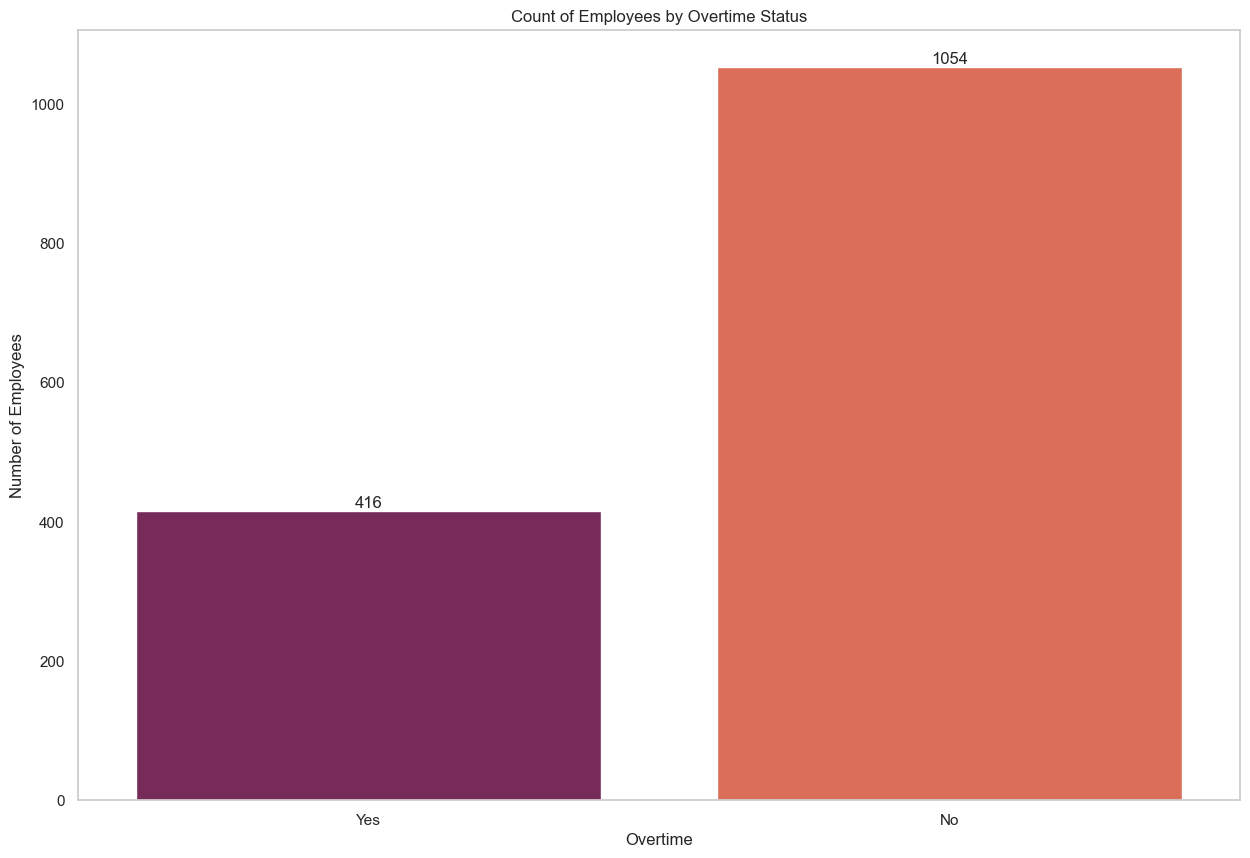

In [21]:
# count the number of employees who have done overtime work
plot = sns.countplot(x='OverTime', data=employees, palette='rocket')
plot.grid(False)
plt.title('Count of Employees by Overtime Status')
plt.xlabel('Overtime')
plt.ylabel('Number of Employees')
for label in plot.containers:
    plot.bar_label(label)
plt.show()

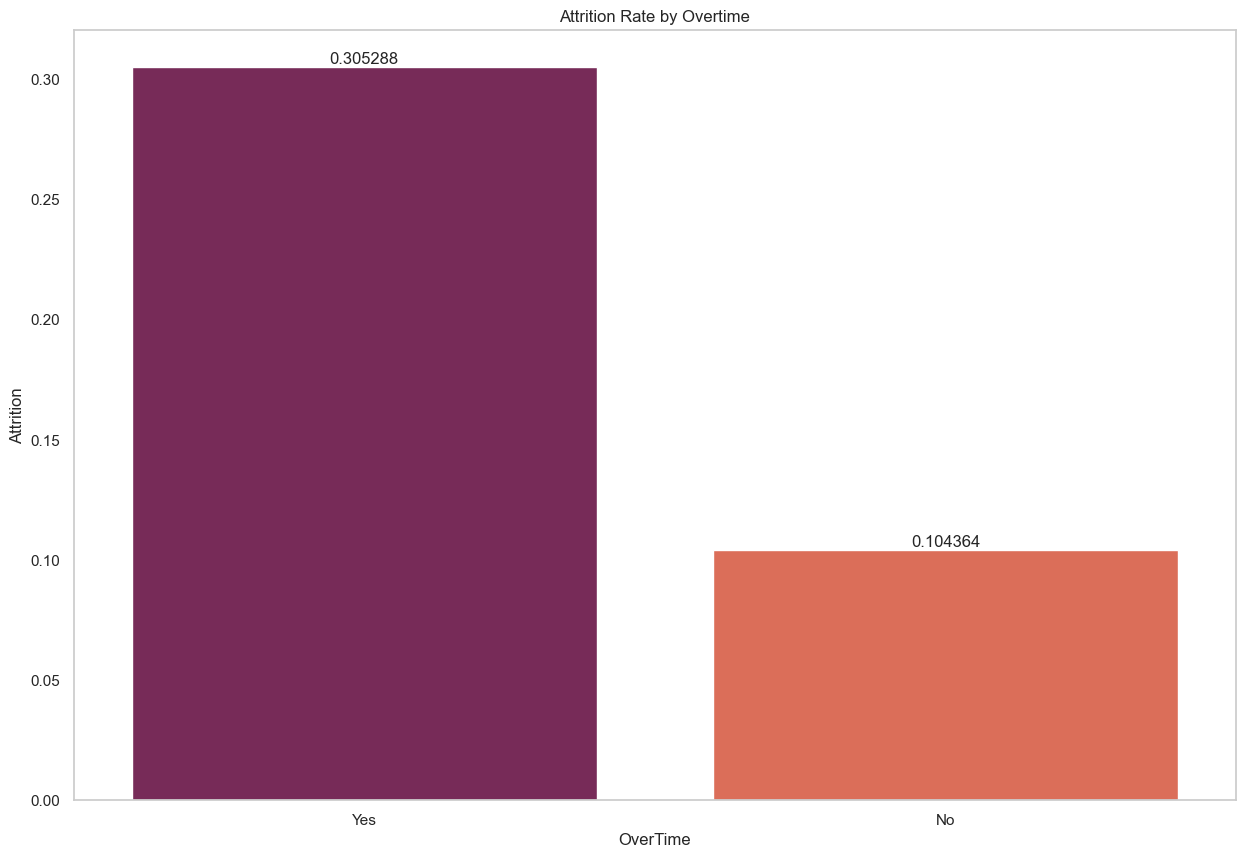

In [22]:
plot = sns.barplot(data=employees, x='OverTime', y='Attrition', ci=None, palette='rocket')
plot.set_title('Attrition Rate by Overtime')
plot.grid(False)
for label in plot.containers:
    plot.bar_label(label)

The attrition rate of those who work overtime is higher than those who don't.

### `TotalWorkingYears`

Based on the distribution of the total working years of employees in IBM, The distribution appears to be right-skewed. This skewness indicates that a larger number of employees have fewer total working years, with a gradually decreasing number of employees as the total working years increase. This could be due to a larger number of positions available for junior level employees as compared to senior level ones. The peak of the histogram (the mode) suggests that the most common range of total working years among employees is on the lower end. This indicates a workforce with a significant proportion of employees who have relatively fewer years of total working experience. The range of total working years spans from employees who are relatively new to the workforce to those with extensive working experience while the presence of employees with a high number of total working years (as indicated by the tail of the distribution) suggests that the company has a mix of both newer and highly experienced employees. The long tail of the distribution could indicate the presence of outliers, or employees with an unusually high number of total working years. These might be employees who have been in the workforce for a significantly longer time, possibly indicating senior or highly experienced staff. The concentration of employees with fewer working years might be a reflection of a workforce that is relatively young or has a significant number of employees in the early or mid-stages of their careers. On the other hand, the presence of employees with many working years can contribute to a diverse range of experiences and skills within the company. A right-skewed distribution with a concentration of employees in the lower range of working years could imply opportunities for training and development programs aimed at less experienced employees and hence the company might benefit from leveraging the knowledge and experience of longer-tenured employees through mentorship programs or leadership roles.

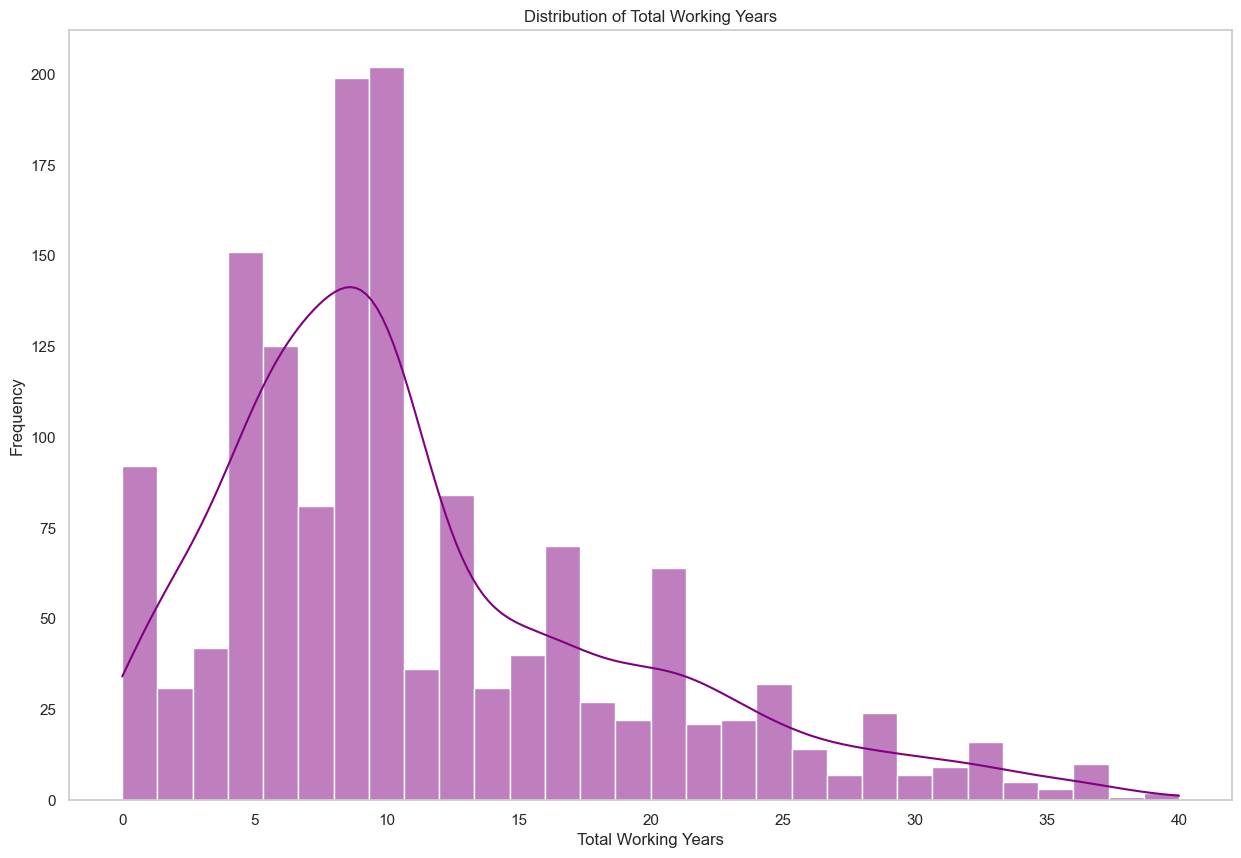

In [23]:
plot = sns.histplot(employees['TotalWorkingYears'], bins=30, kde=True, color='purple')
plot.grid(False)
plt.title('Distribution of Total Working Years')
plt.xlabel('Total Working Years')
plt.ylabel('Frequency')
plt.show()

In [24]:
print('General Statistics')
print(employees['TotalWorkingYears'].describe())
print()
print('Skewness of Plot')
print(employees['TotalWorkingYears'].skew())

General Statistics
count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

Skewness of Plot
1.1171718528128527


The mean total working years would be approximately 11 years.

There is a large spread in the distribution of the total working years of employees as the standard deviation is approximately 8 years.

25% of employees have worked 6 years or less, 25% of employees have worked 15 years or more.

50% of employees have worked 10 years or less, and 50% of employees have worked 10 years or more.

The lowest amount of total years worked would be 0 years, suggesting that these employees are fresh graduates while the highest amount of total years worked would be 40 years.

The data is also highly right skewed as the skewness is 1.117 which suggests that most employees have lower total working years while there are few with high total working years.

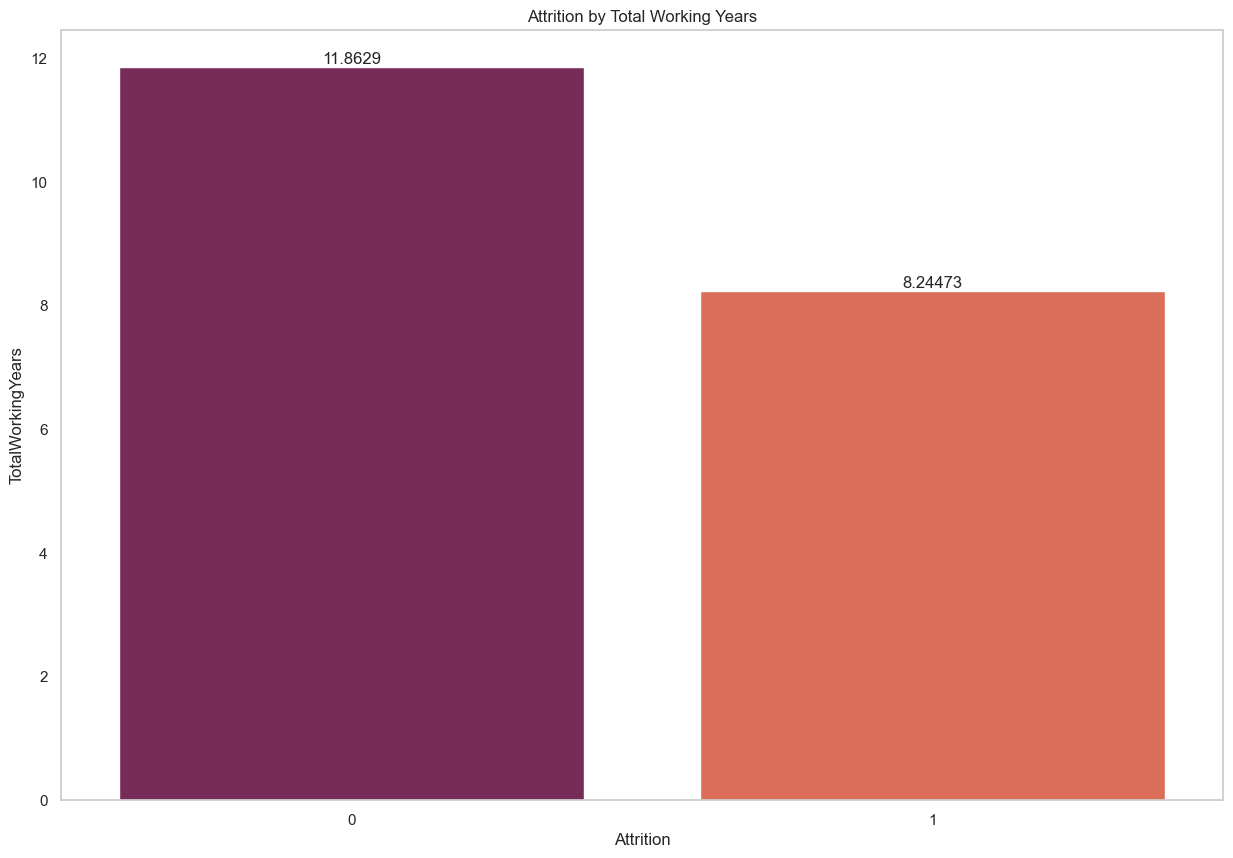

In [25]:
plot = sns.barplot(data=employees, x='Attrition', y='TotalWorkingYears', ci=None, palette='rocket')
plot.set_title('Attrition by Total Working Years')
plot.grid(False)
for label in plot.containers:
    plot.bar_label(label)

People who have worked for a longer period of time were likelier to leave IBM than those with shorter total working years.

### `YearsSinceLastPromotion`

Based on the plot, the distribution appears to be right-skewed. This indicates that a larger number of employees have experienced a promotion relatively recently, with fewer years having passed since their last promotion. This suggests a relatively regular promotion cycle for a substantial part of the workforce. The long tail of the histogram indicates that there are employees who have not been promoted for an extended period (more than 5 years). Employees with very high values of Years Since Last Promotion (far right of the histogram) can be considered outliers. These are individuals who have gone many years without a promotion, which could be a point of concern for employee retention and satisfaction. The concentration of employees with fewer years since their last promotion could reflect effective talent development and career progression policies within the company while the presence of employees with a long duration since their last promotion might warrant further investigation to understand their roles, performance, and potential reasons for the lack of recent career advancement.

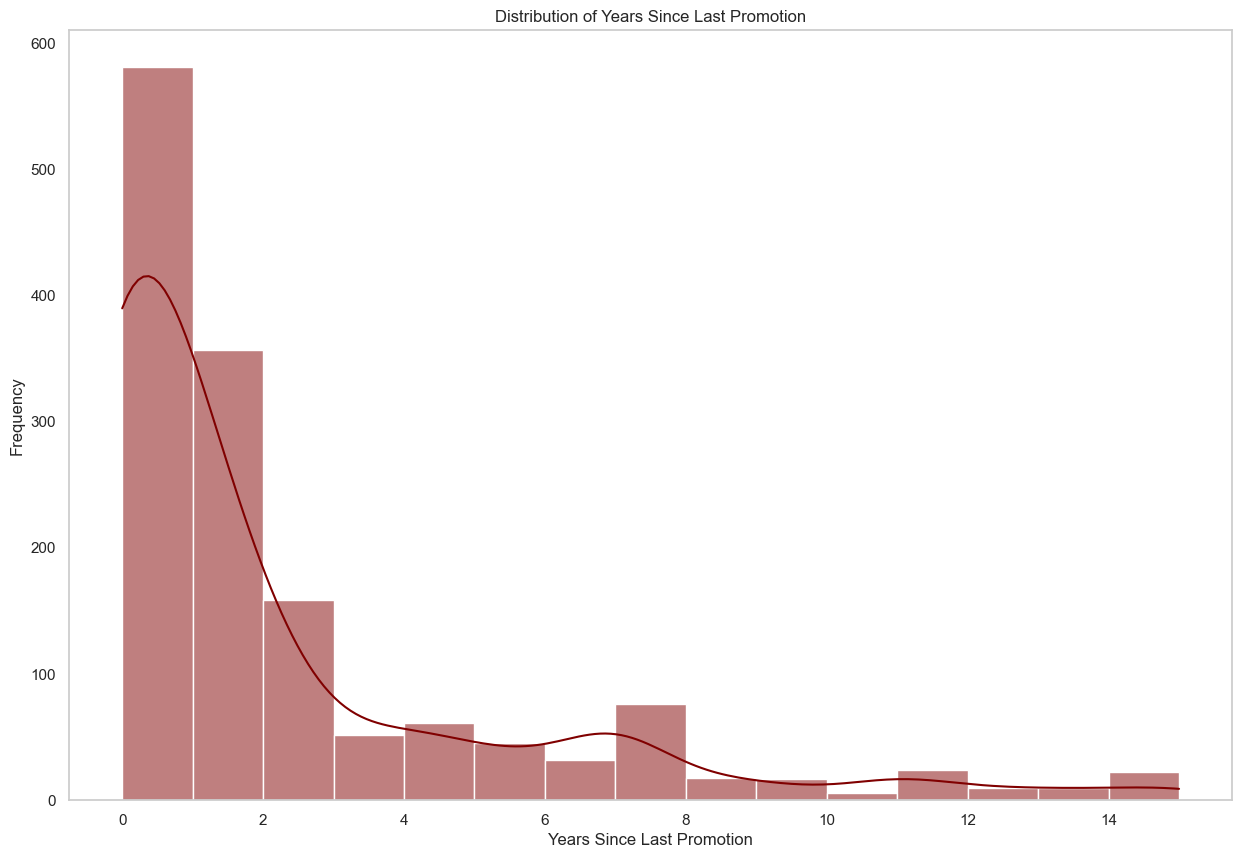

In [26]:
plot = sns.histplot(employees['YearsSinceLastPromotion'], bins=30, kde=True, binwidth=1, color='maroon')
plot.grid(False)
plt.title('Distribution of Years Since Last Promotion')
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Frequency')
plt.show()

In [27]:
print('General Statistics')
print(employees['YearsSinceLastPromotion'].describe())
print()
print('Skewness of Plot')
print(employees['YearsSinceLastPromotion'].skew())

General Statistics
count    1470.000000
mean        2.187755
std         3.222430
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

Skewness of Plot
1.9842899833524859


The mean number of years since last promotion is approximately 2.19 years.

The spread in the number of years since last promotion is large as the standard deviation is approximately 3.22 years.

25% of employees have just been promoted and 25% of employees have been promoted in 3 years or more.

50% of employees have been promoted 1 year ago and 50% of employees have been promoted more than 1 year ago.

The minimum number of years since last promotion is 0 years - they are employees who have just been promoted and the maximum number of years since last promotion is 15 years - this might be something that IBM might want to look into due to the lack of progression of the employee.

The distribution is also highly right skewed as the skewness is 1.984, thus most employees have been recently promoted while there exists some employees who have been promoted after many years (> 7 years).

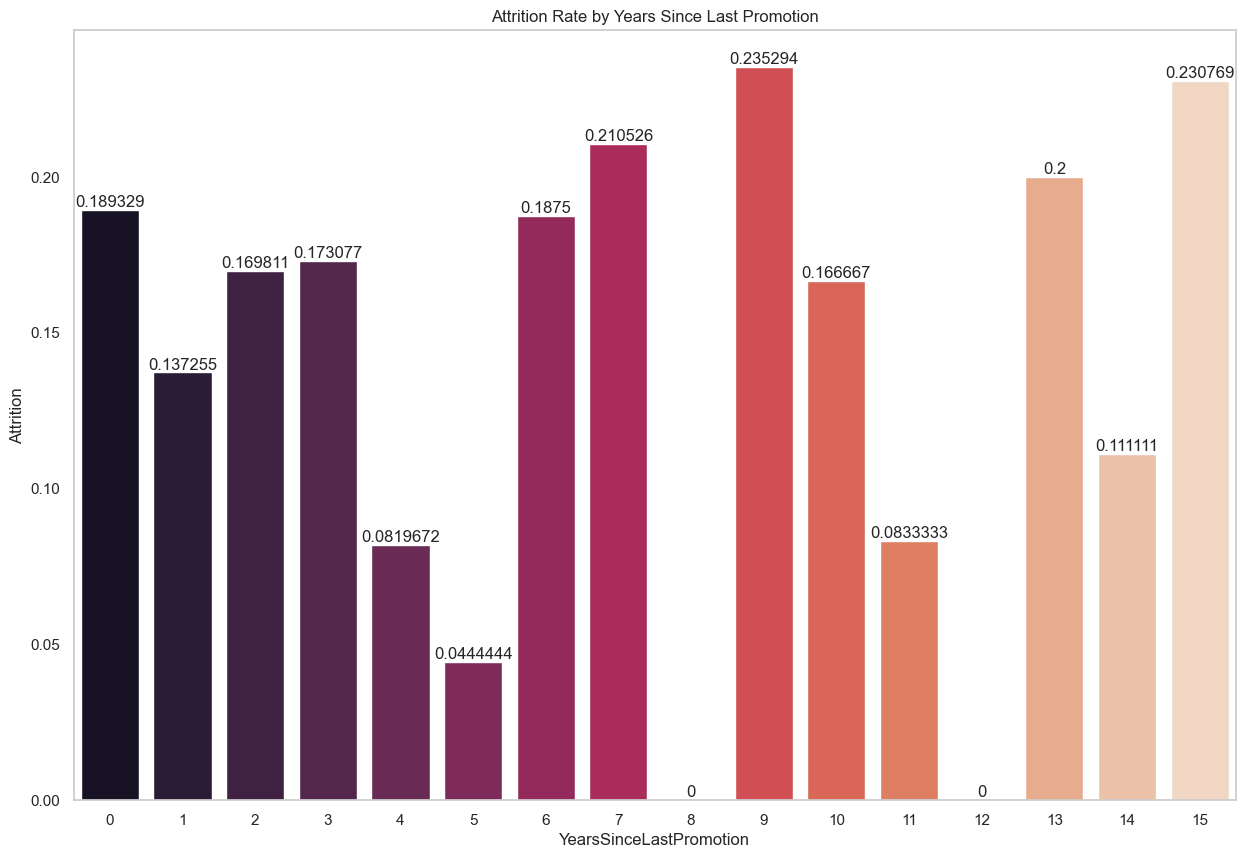

In [28]:
plot = sns.barplot(data=employees, x='YearsSinceLastPromotion', y='Attrition', ci=None, palette='rocket')
plot.set_title('Attrition Rate by Years Since Last Promotion')
plot.grid(False)
for label in plot.containers:
    plot.bar_label(label)

The attrition rate appears to vary based on the number of years since last promotion and hence it is difficult to deduce if the ears since last promotion is correlated with higher attrition rates.

### `Education`

Based on the count plot, most employees possess a bachelor's degree, and this is followed by master's degree, college, below college, then doctorate holders.

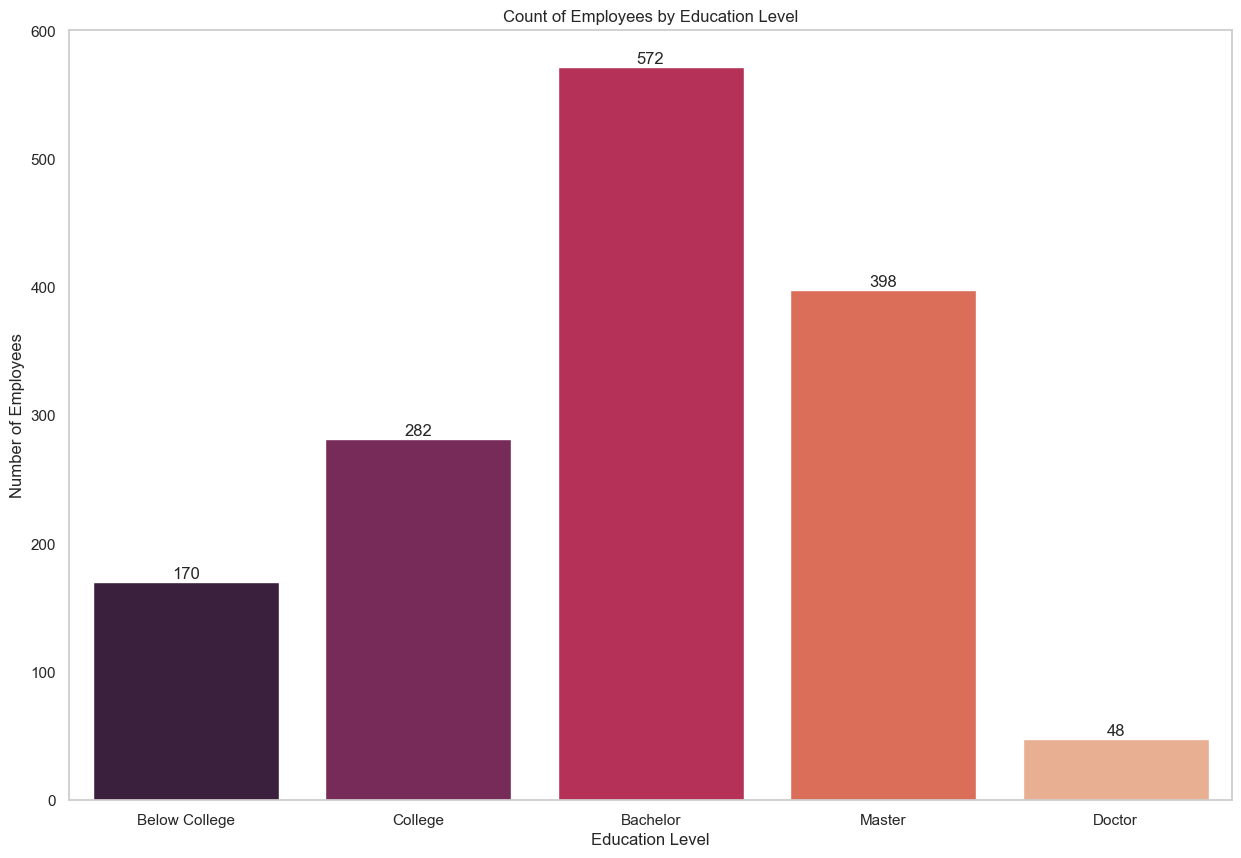

In [29]:
education_levels = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
employees['Education'] = employees['Education'].map(education_levels)
plot = sns.countplot(x='Education', data=employees, order=['Below College', 'College', 'Bachelor', 'Master', 'Doctor'], palette='rocket')
plot.grid(False)
for label in plot.containers:
    plot.bar_label(label)
plt.title('Count of Employees by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Employees')
plt.show()

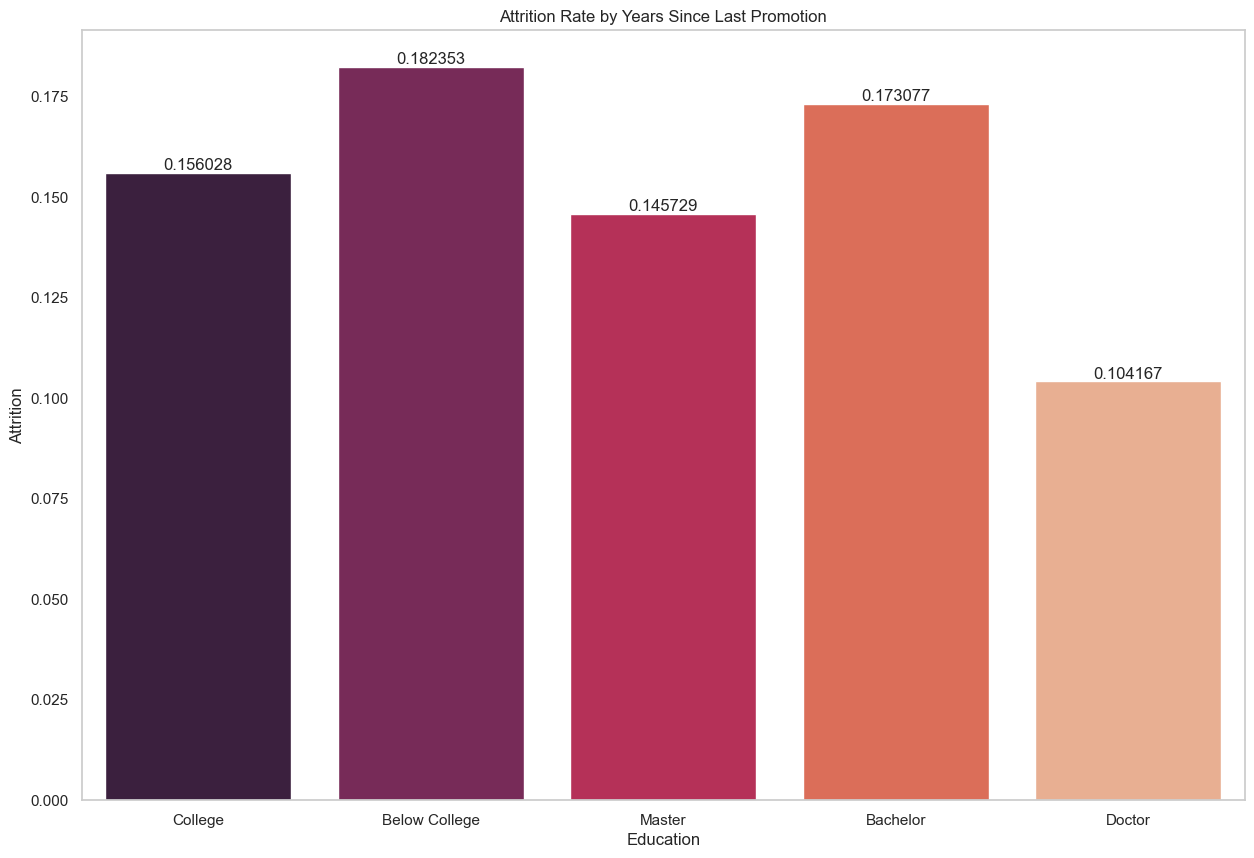

In [30]:
plot = sns.barplot(data=employees, x='Education', y='Attrition', ci=None, palette='rocket')
plot.set_title('Attrition Rate by Years Since Last Promotion')
plot.grid(False)
for label in plot.containers:
    plot.bar_label(label)

The attrition rate also varies by education level and there appears to be no clear relationship between an employee's education level and their attrition.

### `JobSatisfaction`

Based on the plot, we can see that most employees are satisfied with their jobs - which would be a positive sign for IBM and the organisation should  maintain and improve these levels to reduce attrition rates in the company. However, there are also a significant number of people who report low-medium job satisfaction levels and hence this would be an issue to look into for the organisation to retain its talent effectively.

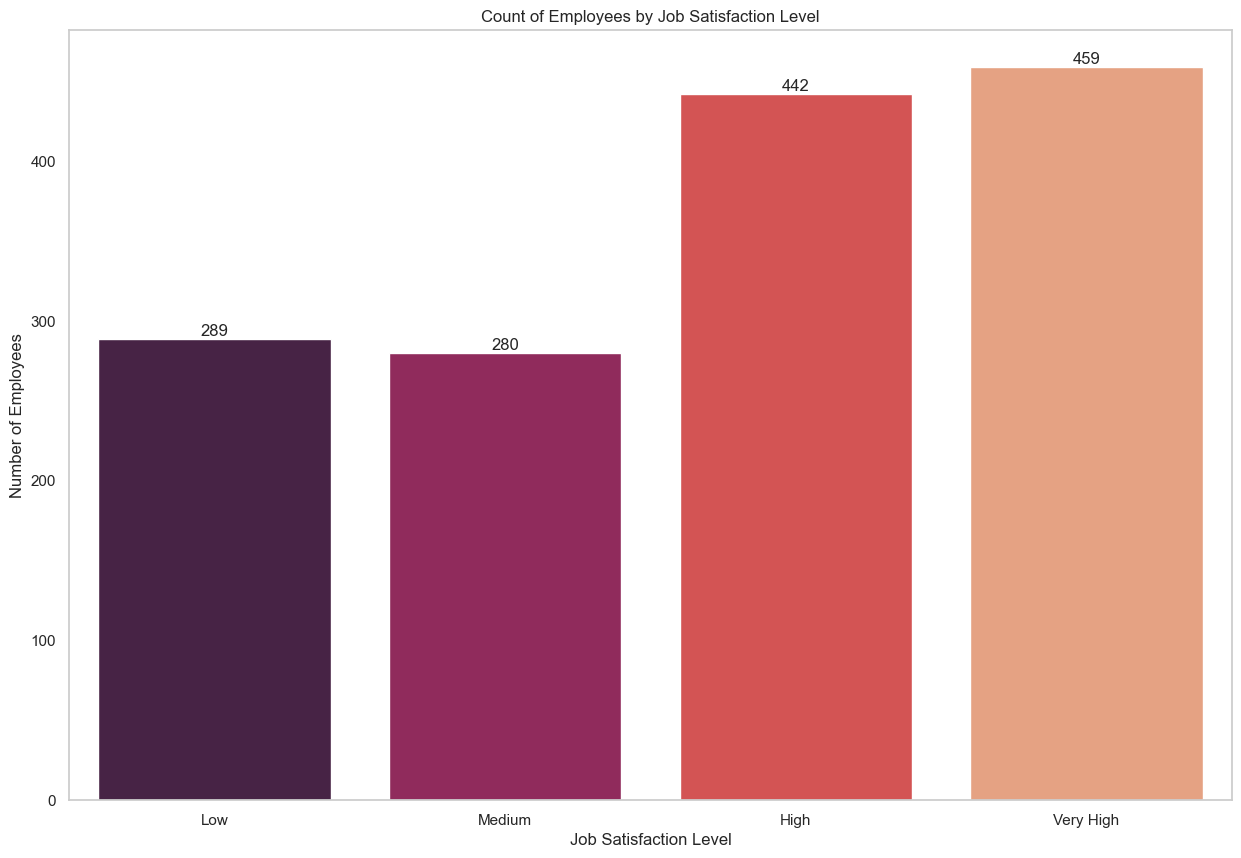

In [31]:
job_satisfaction_levels = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
employees['JobSatisfaction'] = employees['JobSatisfaction'].map(job_satisfaction_levels)
plot = sns.countplot(x='JobSatisfaction', data=employees, order=['Low', 'Medium', 'High', 'Very High'], palette='rocket')
plot.grid(False)
for label in plot.containers:
    plot.bar_label(label)
plt.title('Count of Employees by Job Satisfaction Level')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Number of Employees')
plt.show()

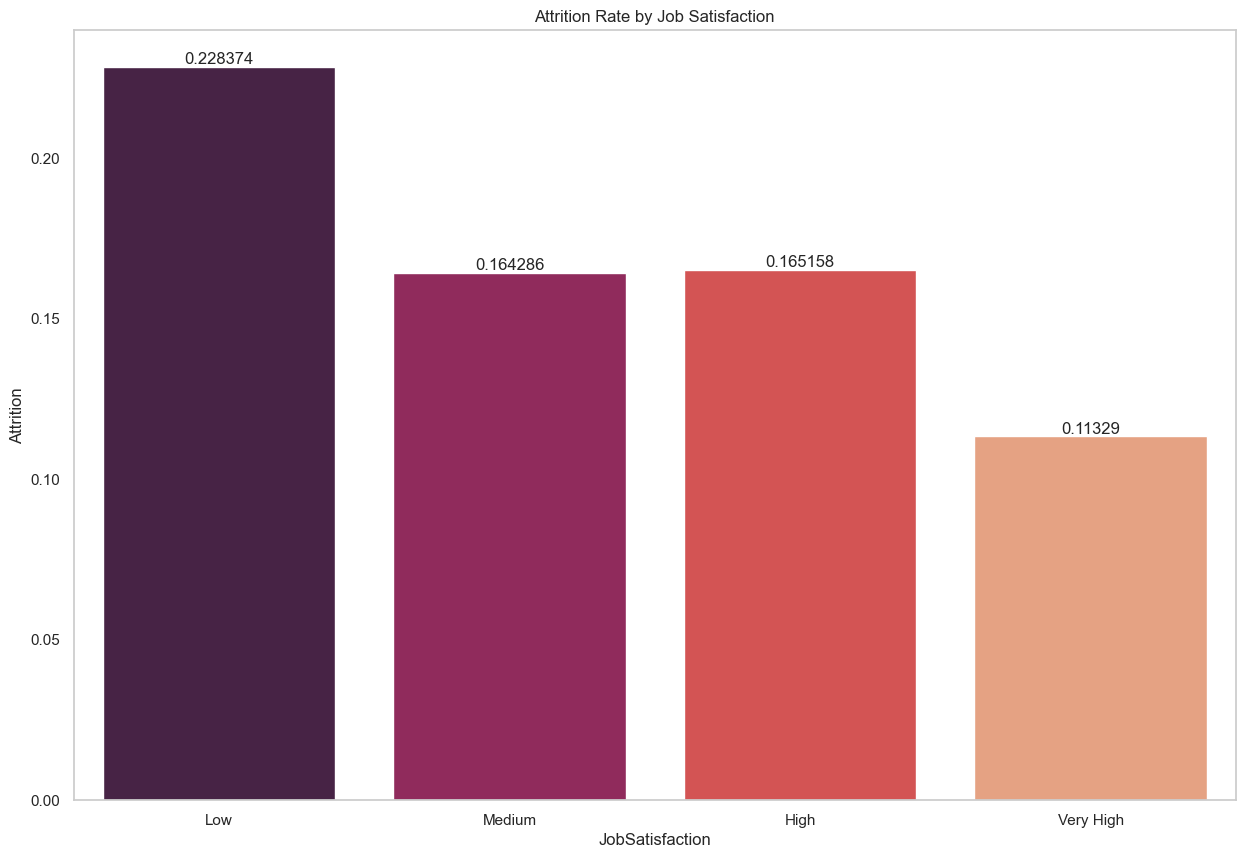

In [32]:
plot = sns.barplot(data=employees, x='JobSatisfaction', y='Attrition', ci=None, palette='rocket', order=['Low', 'Medium', 'High', 'Very High'])
plot.set_title('Attrition Rate by Job Satisfaction')
plot.grid(False)
for label in plot.containers:
    plot.bar_label(label)

The attrition rate of those who were the least satisfied with their job tends to be higher than those who are satisfied with their jobs. 

### `NumCompaniesWorked`

There is a wide distribution across different values indicates a diverse workforce with varied professional backgrounds. Employees who have worked at multiple companies could bring diverse experiences and skills. Most people in IBM have worked at 1 company prior to joining IBM, which likely indicates that most of their employees are either junior employees or senior employees who have remained at IBM for a long period of time. There also exists a significant number of employees who have worked for more than 5 companies prior to joining IBM which suggests that these employees likely have broader industry exposure and potentially high adaptability, having experienced varied corporate cultures and practices. This can be beneficial in mentorship roles or diversified projects within IBM.

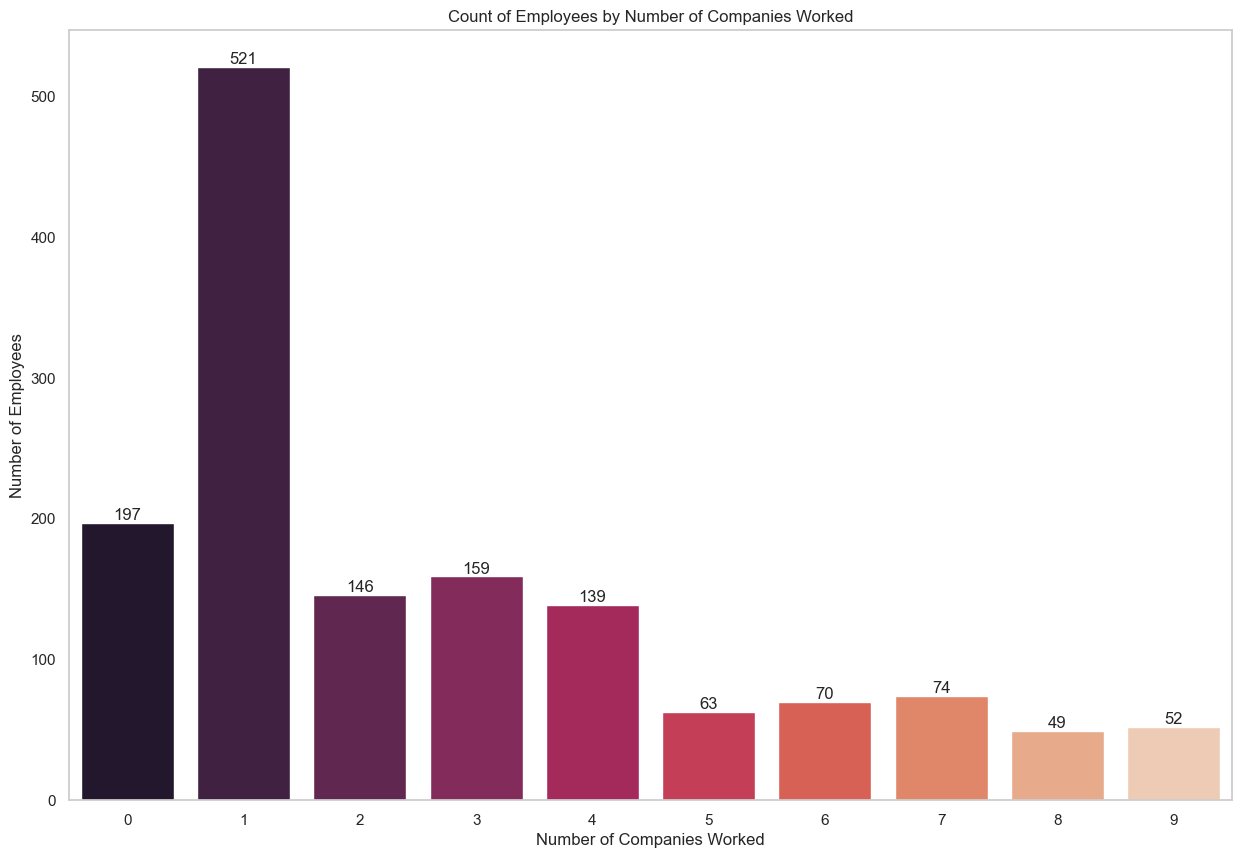

In [33]:
plot = sns.countplot(x='NumCompaniesWorked', data=employees, palette='rocket')
plot.grid(False)
for label in plot.containers:
    plot.bar_label(label)
plt.title('Count of Employees by Number of Companies Worked')
plt.xlabel('Number of Companies Worked')
plt.ylabel('Number of Employees')
plt.show()

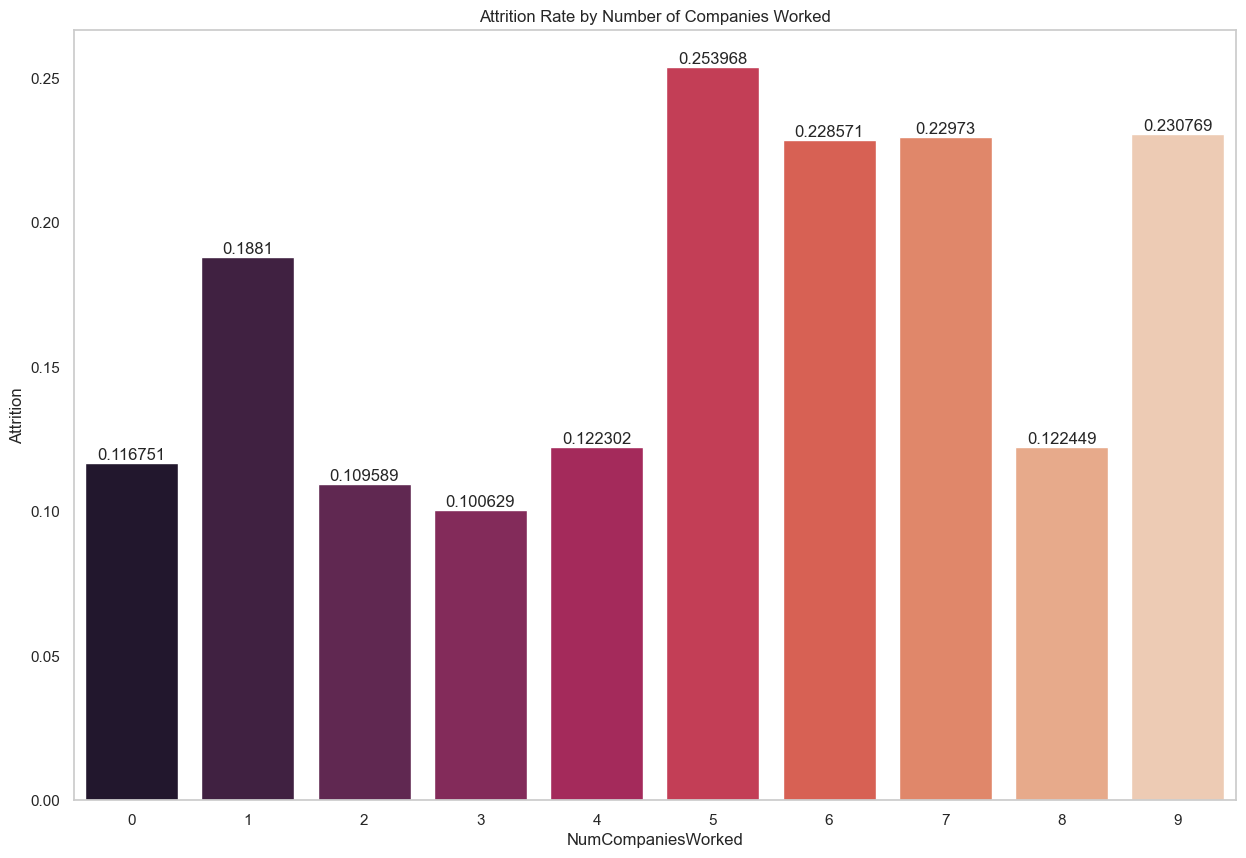

In [34]:
plot = sns.barplot(data=employees, x='NumCompaniesWorked', y='Attrition', ci=None, palette='rocket')
plot.set_title('Attrition Rate by Number of Companies Worked')
plot.grid(False)
for label in plot.containers:
    plot.bar_label(label)

The attrition rate tends to be higher for those who have worked at many (> 5 companies) companies as compared to those who have worked for fewer companies prior to joining IBM.

### `PercentSalaryHike`

Based on the boxplot, the median percentage salary hike of IBM employees is 14%, the lower quartile of salary hikes would be 12%, and the upper quartile of the salary hike would be 18%. The distribution of salary hikes appears to be right skewed as well, with some employees receiving a larger percentage salary hike. Reviewing these data can be useful especially if attrition is linked to the percentage salary hike such that IBM can modify their salary increments to retain their manpower better.

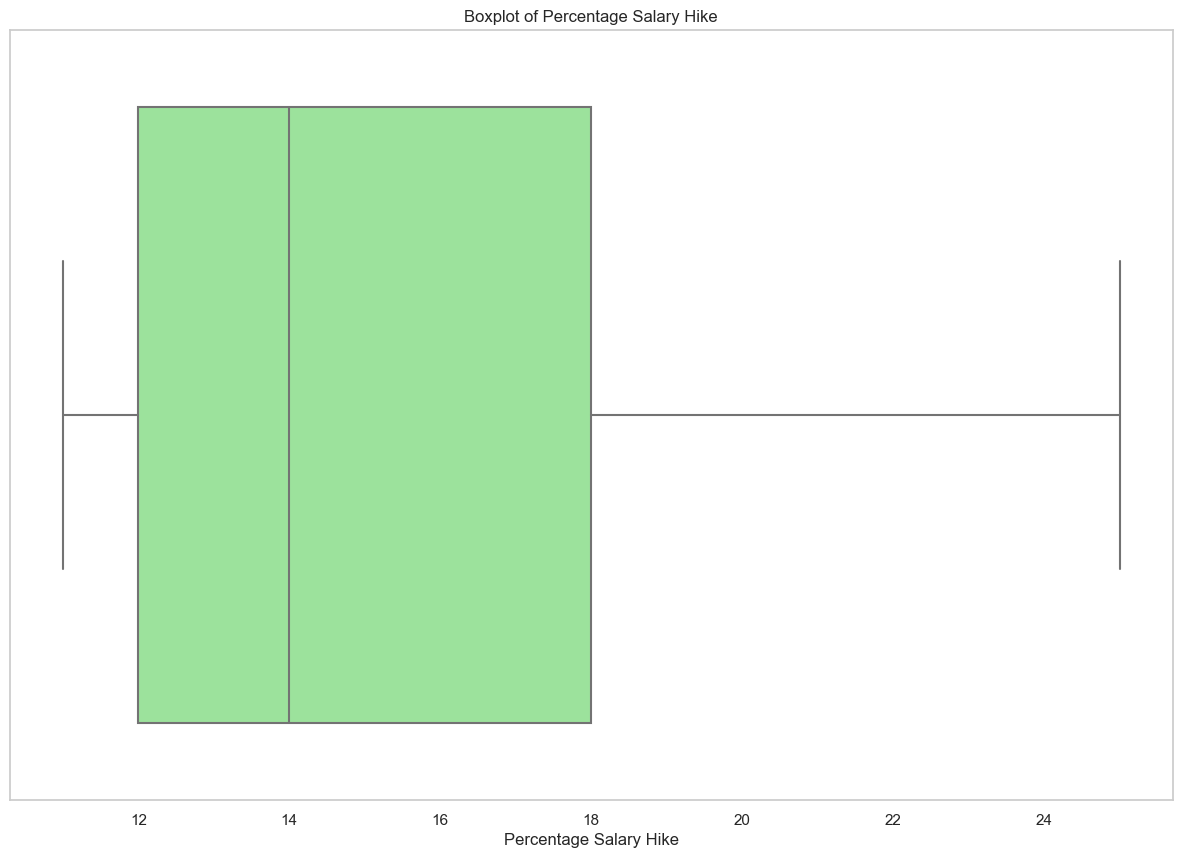

In [35]:
plot = sns.boxplot(x=employees['PercentSalaryHike'], color='lightgreen')
plot.grid(False)
plt.title('Boxplot of Percentage Salary Hike')
plt.xlabel('Percentage Salary Hike')
plt.show()

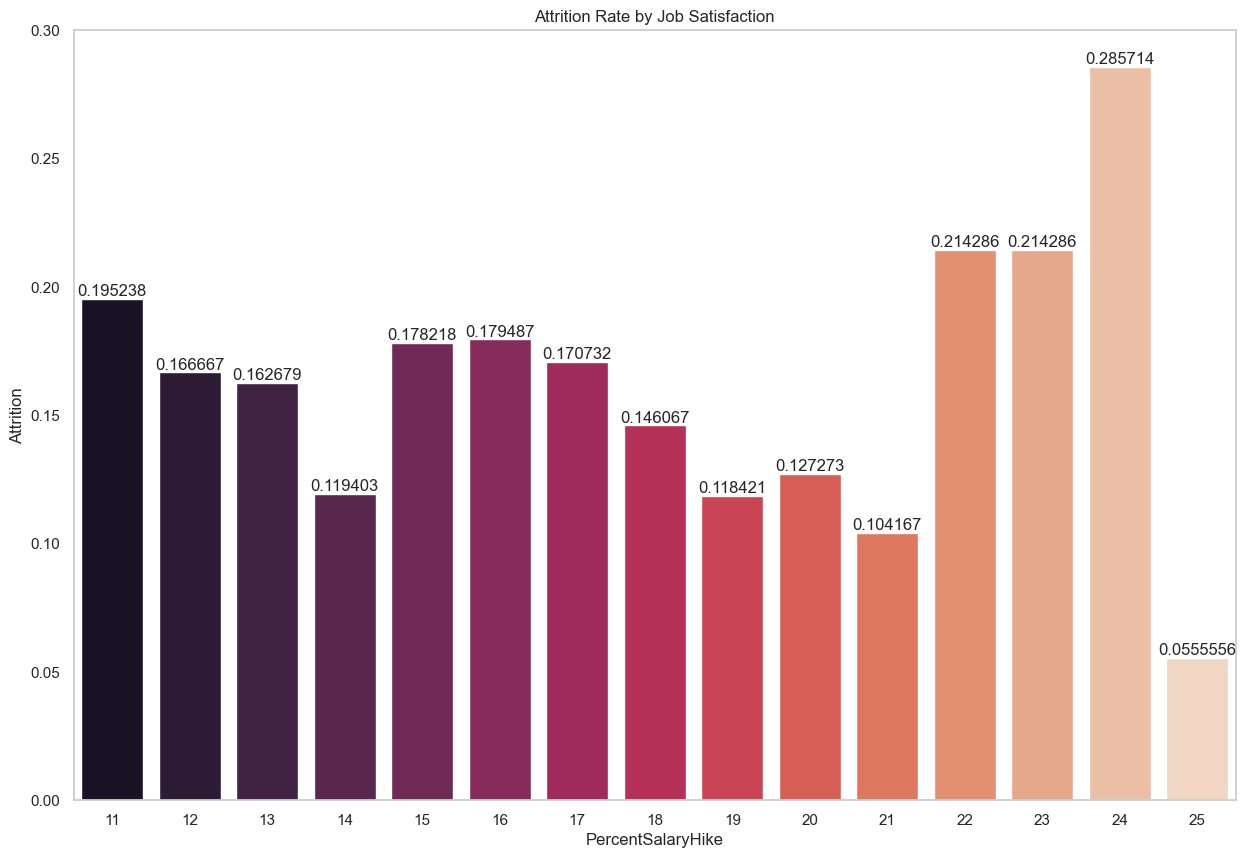

In [36]:
plot = sns.barplot(data=employees, x='PercentSalaryHike', y='Attrition', ci=None, palette='rocket')
plot.set_title('Attrition Rate by Job Satisfaction')
plot.grid(False)
for label in plot.containers:
    plot.bar_label(label)

The attrition rate varies by the percentage of salary hikes here and it is difficult to determine whether a higher percentage of salary hikes is correlated with attrition. One thing that is noteworthy is the high attrition rates even in employees who have received a larger percentage of salary hikes (22-24%) - normally one would expect an employee who has received a large increase in salary to remain within the company, but it appears not to be the case here. This might be due to other reasons such as a low salary base which might inflate the percentage of salary hikes.

### `WorkLifeBalance`

Based on the plot, we can tell that most of the employees at IBM rate their work life balance as good and above - this is a good sign as it allows IBM to better attract and retain talent, which can enhance the operations at IBM. Hence, IBM should continue to improve and maintain such a culture that values work life balance due to the benefits it can bring to the organisation.

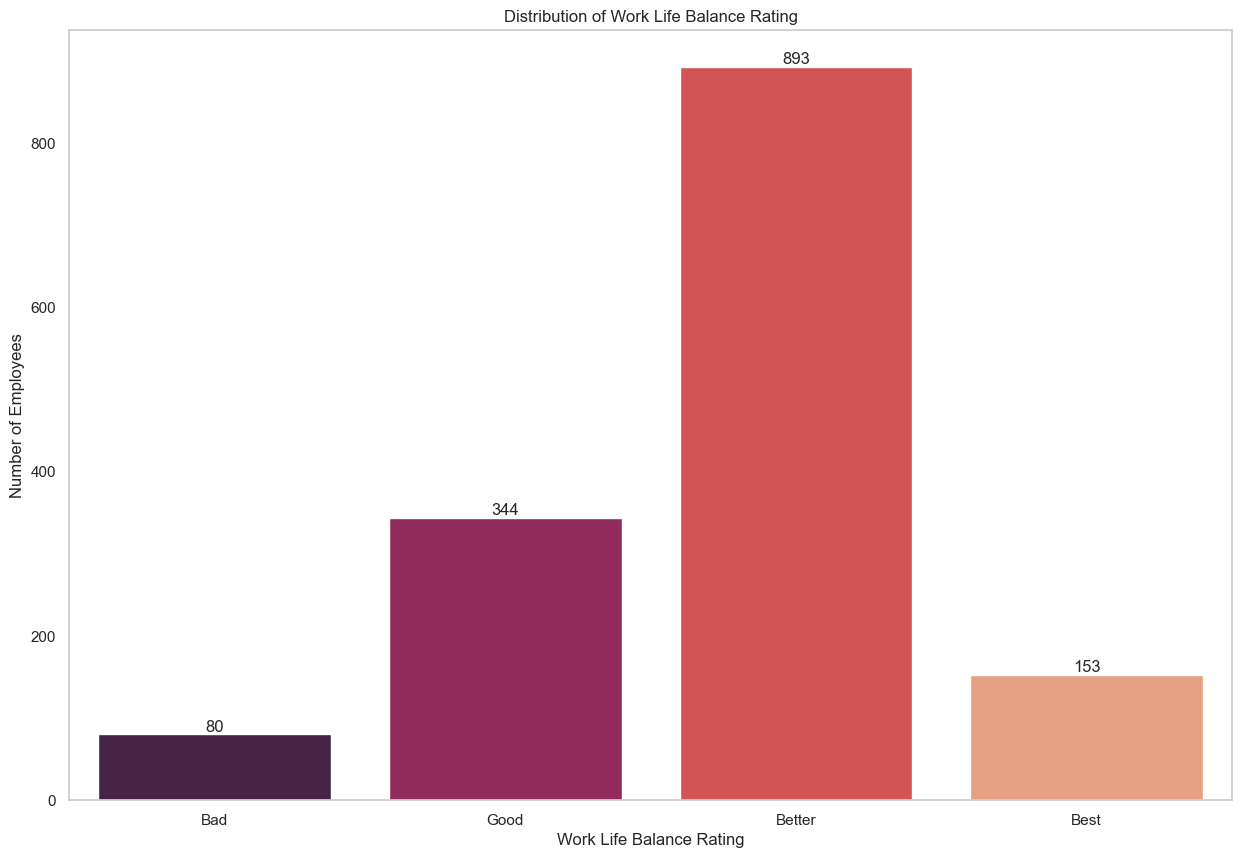

In [37]:
work_life_balance_levels = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
employees['WorkLifeBalance'] = employees['WorkLifeBalance'].map(work_life_balance_levels)
plot = sns.countplot(x='WorkLifeBalance', data=employees, order=['Bad', 'Good', 'Better', 'Best'], palette='rocket')
plot.grid(False)
for label in plot.containers:
    plot.bar_label(label)
plt.title('Distribution of Work Life Balance Rating')
plt.xlabel('Work Life Balance Rating')
plt.ylabel('Number of Employees')
plt.show()

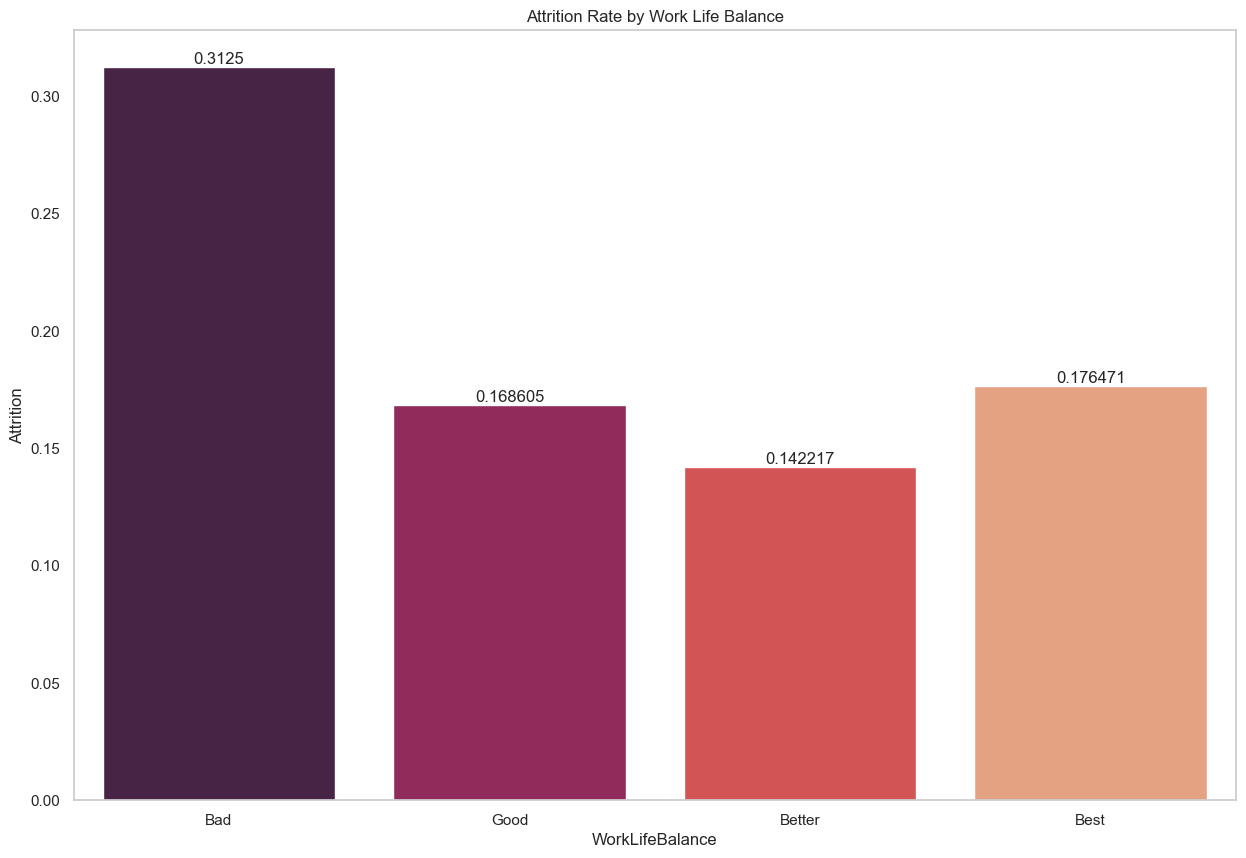

In [38]:
plot = sns.barplot(data=employees, x='WorkLifeBalance', y='Attrition', ci=None, palette='rocket', order=['Bad', 'Good', 'Better', 'Best'])
plot.set_title('Attrition Rate by Work Life Balance')
plot.grid(False)
for label in plot.containers:
    plot.bar_label(label)

The attrition rate is the highest for employees with poor work life balance, which is natural and IBM might want to consider implementing measures to ameliorate the work life balance of its employees to improve talent retention.

### `DistanceFromHome`

The plot shows a right-skewed distribution, which is typical for distance data. This means that a larger number of employees live relatively close to the workplace, with fewer employees living at increasing distances. The peaks near the lower end of the scale suggest that most employees reside relatively close to the office. A long right tail in the distribution points to a segment of the workforce facing longer commutes, which might impact their work-life balance and overall job satisfaction and hence organizational policies on remote work, flexible hours, need to be reviewed to improve employee welfare. For example, a significant number of employees with long commutes might benefit from flexible working arrangements. Alternatively, the company might consider transportation support or infrastructure improvements  such as shuttle services or collaboration with public transportation providers that can help shorten commute times for the employees.

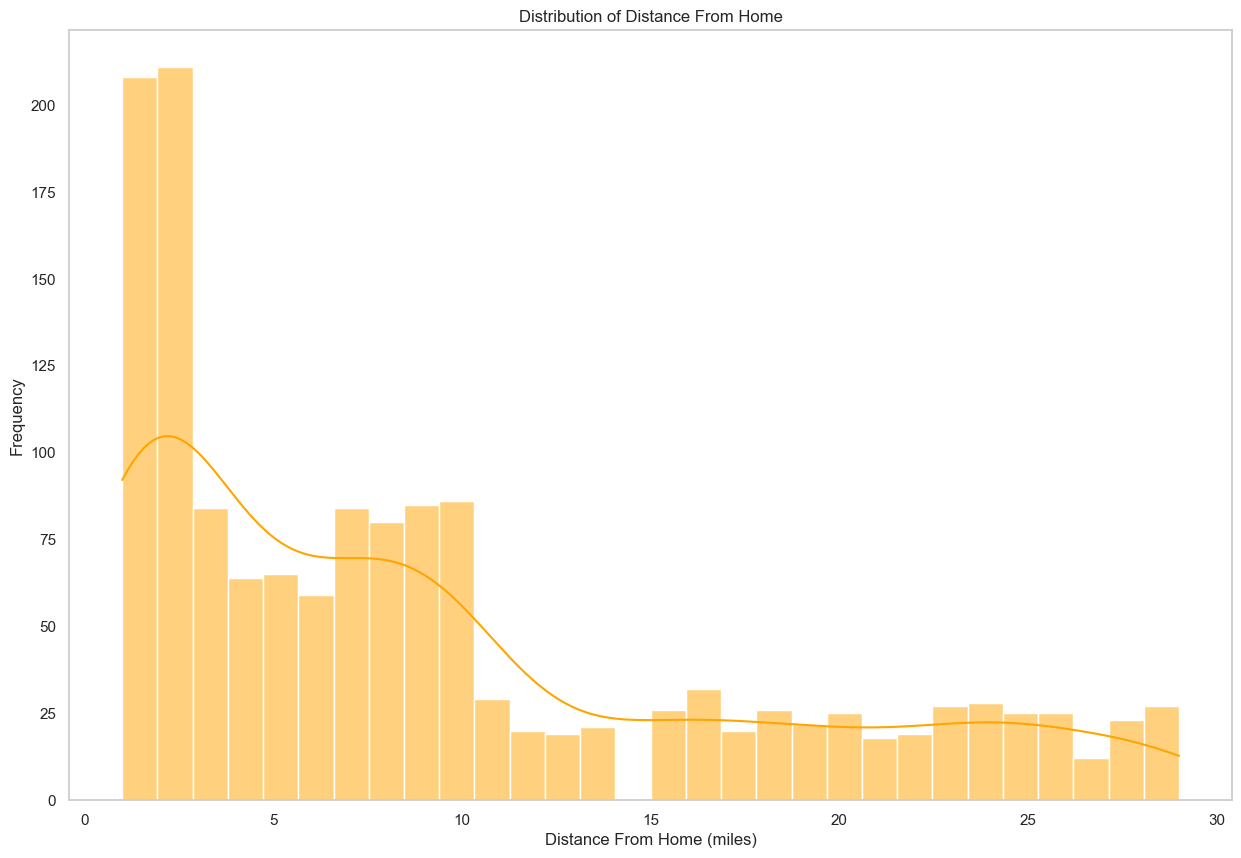

In [39]:
plot = sns.histplot(employees['DistanceFromHome'], bins=30, kde=True, color='orange')
plot.grid(False)
plt.title('Distribution of Distance From Home')
plt.xlabel('Distance From Home (miles)')
plt.ylabel('Frequency')
plt.show()

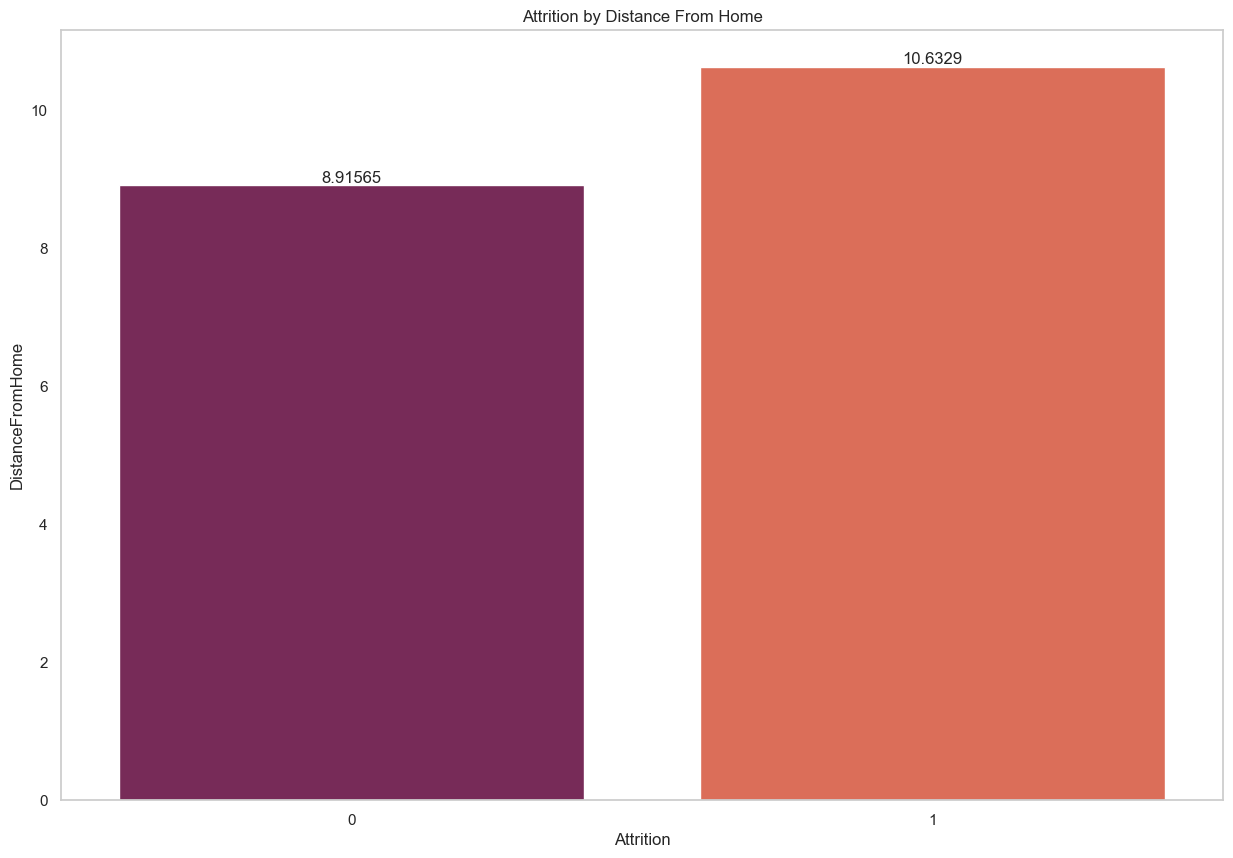

In [40]:
plot = sns.barplot(data=employees, x='Attrition', y='DistanceFromHome', ci=None, palette='rocket')
plot.set_title('Attrition by Distance From Home')
plot.grid(False)
for label in plot.containers:
    plot.bar_label(label)

Employees who lived further away from IBM's office are likelier to leave IBM - this is natural since the longer commute to work can affect their job satisfaction which might result in higher attrition rates.

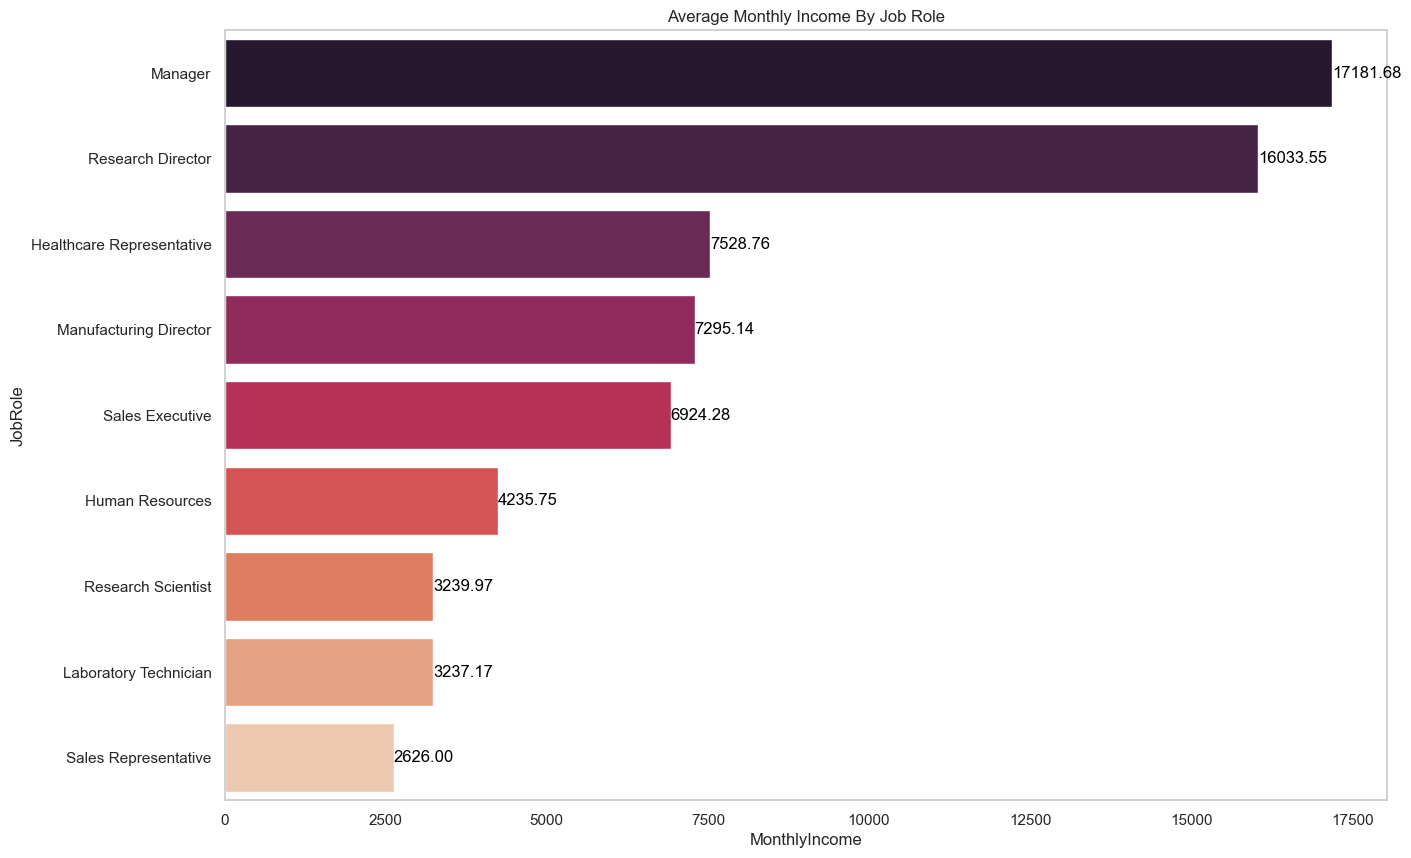

In [41]:
# sort average monthly income by role in descending order
average_monthly_income_by_role = employees.groupby('JobRole')['MonthlyIncome'].mean().reset_index().sort_values(by='MonthlyIncome', ascending=False)
# make barplot of mean monthly income vs job role
plot = sns.barplot(x='MonthlyIncome', y='JobRole', data=average_monthly_income_by_role, estimator=np.mean, ci=None, palette='rocket')
# set title of barplot
plot.set(title='Average Monthly Income By Job Role')
ax = plt.gca()
# label each bar with its corresponding values
for index, value in enumerate(average_monthly_income_by_role['MonthlyIncome']):
    ax.text(value, index, f"{value:.2f}", color='black', va='center', ha='left')
plot.grid(False)
plt.show()

Before we analyse the data, we shall first calculate the exact mean salary per job role.

In [42]:
print(employees.groupby('JobRole')['MonthlyIncome'].mean().sort_values())

JobRole
Sales Representative          2626.000000
Laboratory Technician         3237.169884
Research Scientist            3239.972603
Human Resources               4235.750000
Sales Executive               6924.279141
Manufacturing Director        7295.137931
Healthcare Representative     7528.763359
Research Director            16033.550000
Manager                      17181.676471
Name: MonthlyIncome, dtype: float64


On average, research directors and managers are paid the highest within IBM, which is to be expected as it reflects their seniority and critical nature of their roles within IBM. In contrast, sales representatives, laboratory technicians and research scientists have lower monthly income levels. This shows that IBM has an organisation structure where higher responsibility and more specialised roles command higher salaries.

Now, let us visualise and analyse the distribution of the number of years spent at the company.

### `YearsAtCompany`

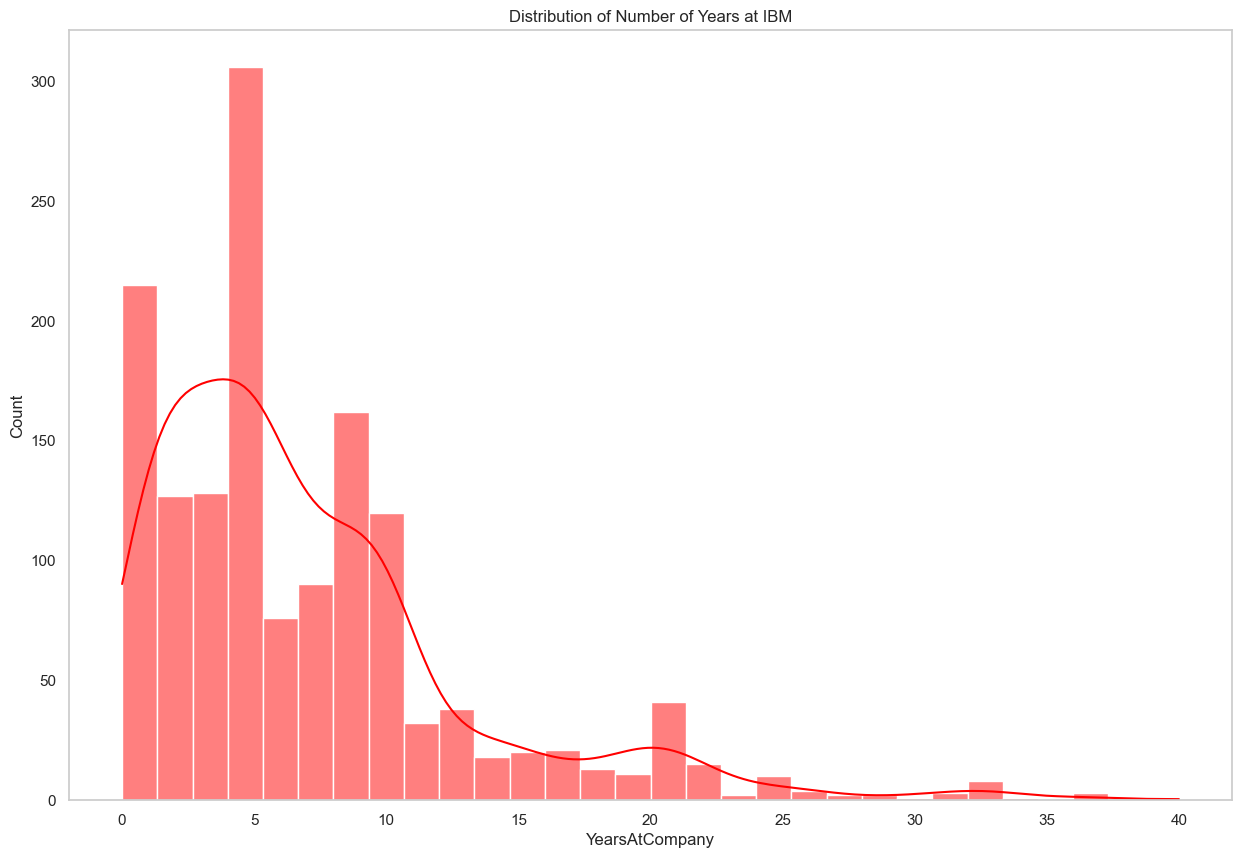

In [43]:
# make histogram of number of years spent at a company
plot = sns.histplot(employees['YearsAtCompany'], bins=30, kde=True, color='red')
plot.set(title='Distribution of Number of Years at IBM')
plot.grid(False)
plt.show()

Let's obtain additional information about the distribution of the number of years spent at a company.

In [44]:
print('General Statistics')
print(employees['YearsAtCompany'].describe())
print()
print('Skewness of Plot')
print(employees['YearsAtCompany'].skew())

General Statistics
count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

Skewness of Plot
1.7645294543422085


Based on the information obtained, employees have been with IBM for approximately 7.01 years on average. 

There is a wide spread in the tenure data as the standard deviation is 6.127 years - thus suggesting that there is significant variability in how long a person spends with IBM.

The shortest tenure recorded is 0 years which would include the new hires of IBM.

25% of employees have been with IBM for 3 years or lesser - which indicates that 25% of employees are relatively new

The median tenure would be 5 years which would mean that half of all employees worked for a duration of 5 years or lesser while another half worked at IBM for 5 years or more

25% of employees have worked for IBM for 9 years or more - indicating that there are also people who remain employed by the company for long periods of time

The longest tenure recorded would be 40 years which indicates that there are employees who have dedicated a significant portion of their careers to IBM

The skewness of the plot is 1.765 which suggests a highly right skewed distribution. This suggests that the majority of employees have shorter tenures, with a few people having long tenures at IBM. This would also likely be a natural phenomenon due to ongoing recruitment of new employees and the natural turnover at IBM.

## Preparing the Data for Forecasting

### Checking for Missing Data

In [45]:
employees.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

After evaluating the models on different attributes, these are the attributes that provide the most information without too much noise in the data.

In [46]:
# cols = ['Department', 'Gender', 'EnvironmentSatisfaction', 'MaritalStatus', 'OverTime', 'Education', 'JobSatisfaction', 'WorkLifeBalance', 'Age', 'DistanceFromHome', 'MonthlyIncome', 'YearsSinceLastPromotion', 'PercentSalaryHike', 'YearsAtCompany', 'NumCompaniesWorked', 'Attrition']
# cols = ['Department', 'Gender', 'EnvironmentSatisfaction', 'MaritalStatus', 'OverTime', 'Education', 'JobSatisfaction', 'WorkLifeBalance', 'Attrition']
cols = ['Department', 'Gender', 'EnvironmentSatisfaction', 'MaritalStatus', 'OverTime', 'Education', 'JobSatisfaction', 'WorkLifeBalance', 'MonthlyIncome', 'Attrition']
df = employees[cols]
df.shape

(1470, 10)

### Creating Dummy Variables

In [47]:
for col in cols[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])
df.head()

,Attrition,Department_Human Resources,Department_Research & Development,Department_Sales,Gender_Female,Gender_Male,EnvironmentSatisfaction_High,EnvironmentSatisfaction_Low,EnvironmentSatisfaction_Medium,EnvironmentSatisfaction_Very High,...,MonthlyIncome_19717,MonthlyIncome_19740,MonthlyIncome_19833,MonthlyIncome_19845,MonthlyIncome_19847,MonthlyIncome_19859,MonthlyIncome_19926,MonthlyIncome_19943,MonthlyIncome_19973,MonthlyIncome_19999
0,1,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting Data

In [48]:
num_columns = len(df.columns)
X = df.drop(columns = 'Attrition')
Y = df['Attrition']

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state = 0)

Y_train = Y_train.to_numpy().ravel()
Y_val = Y_val.to_numpy().ravel()

# upsampling X_train, Y_train
oversample = SMOTE()
X_train, Y_train = oversample.fit_resample(X_train, Y_train)

### Upsampling Results

After upsampling, the labels are now balanced.

In [49]:
df_describe = pd.DataFrame(Y_train)
df_describe.value_counts()

0    988
1    988
dtype: int64

# Forecasting

### Creating a Model

We will be using K Nearest Neighbours, Logistic Regression, Decision Trees, Random Forests and Support Vector Machines to forecast whether an employee leaves IBM or not.

### Evaluation Metrics

We will evaluate the
- __Accuracy__: the number of correct values / total values
- __Precision__: the number of true positives / sum of true positives and false negatives
- __Recall__: the numbr of true positives / sum of true positives and false positives
- __F1-Score__: a combination of precision and recall that balances both values
- __Macro Avg__: unweighted mean value of precision and recall
- __Weighted Avg__: weighted mean value of precision and recall by the support values for each class
- __Support__: number of values in the class to predict

Given that we want to accurately predict whether an employee will leave IBM, we want to maximise the number of true positives and true negatives while minimising the number of false negatives and false positives. Hence we will be using the accuracy and recall of the model as a key metric in evaluating a model.

### Logistic Regression

We would first be using a logistic regression model to forecast an employee's attrition.

In [50]:
logistic = LogisticRegression(multi_class="multinomial", max_iter = 100000).fit(X_train, Y_train)
predictions = logistic.predict(X_val)
print(classification_report(Y_val, predictions))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       245
           1       0.73      0.22      0.34        49

    accuracy                           0.86       294
   macro avg       0.80      0.60      0.63       294
weighted avg       0.84      0.86      0.82       294



The accuracy of the model is 85% which is reasonable since the probability of guessing whether an employee leaves IBM or not is 50%. In terms of recall, about 80% of employees who left IBM would be incorrectly predicted to have not left IBM.

### K Nearest Neighbours

We will now use the K Nearest Neighbours model to see if it outperforms the logistic regression model. We will loop through a range of values to find the optimal k. This model does not perform well as the recall of the model is much poorer at 0.02.

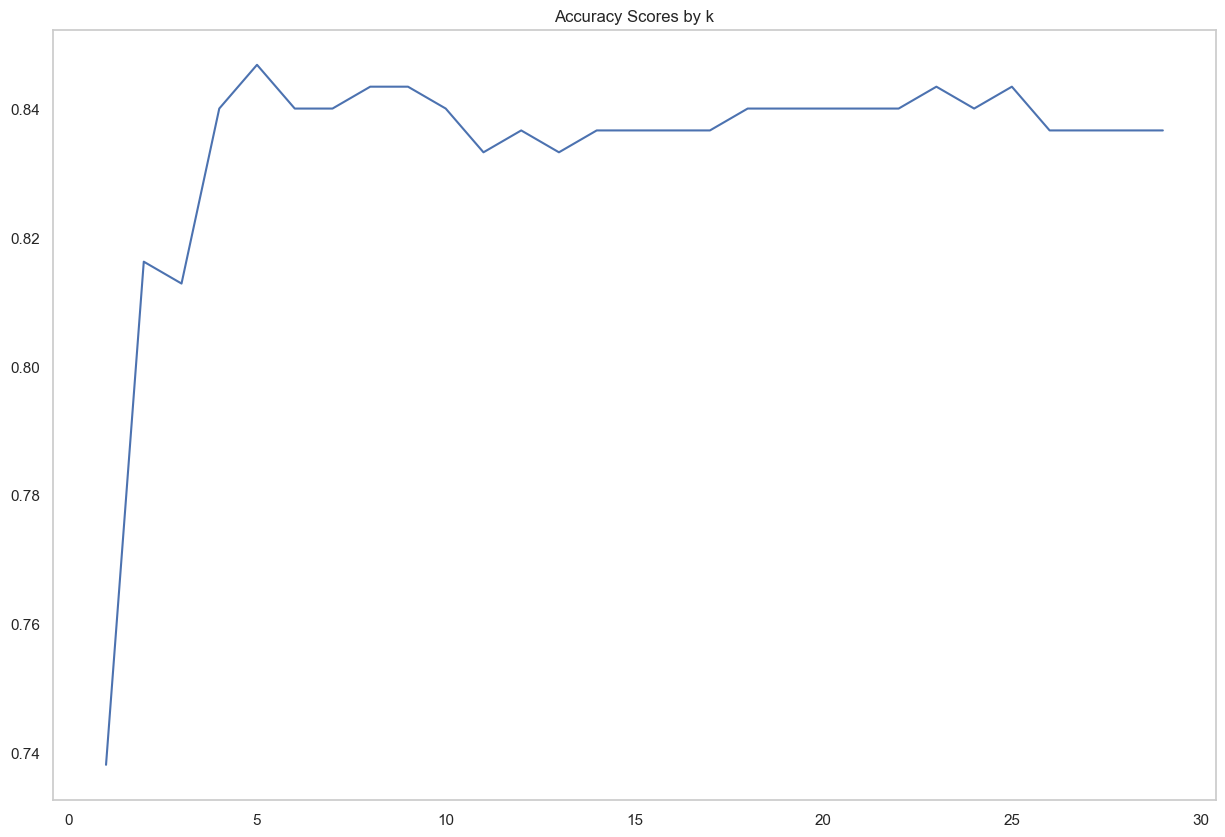

In [51]:
accuracy_scores = []
for k in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors = k).fit(X_train, Y_train)
    prediction = knn_model.predict(X_val)
    accuracy = accuracy_score(Y_val, prediction)
    accuracy_scores.append(accuracy)

plt.plot(range(1, 30), accuracy_scores)
plt.title('Accuracy Scores by k')
plt.grid(False)
plt.show()

In [52]:
knn = KNeighborsClassifier(n_neighbors = 14).fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_val)
print(classification_report(Y_val, knn_predictions))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       245
           1       1.00      0.02      0.04        49

    accuracy                           0.84       294
   macro avg       0.92      0.51      0.48       294
weighted avg       0.86      0.84      0.77       294



### Decision Trees

The results are similar to that of the logistic regression model as the accuracy of the model is slightly lower at 82% (compared to the logistic regression's accuracy of 86%) and the recall of the decision tree model is also higher at 0.35.

In [53]:
tree = DecisionTreeClassifier().fit(X_train, Y_train) 
tree_predictions = tree.predict(X_val)
print(classification_report(Y_val, tree_predictions))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       245
           1       0.44      0.31      0.36        49

    accuracy                           0.82       294
   macro avg       0.66      0.61      0.63       294
weighted avg       0.80      0.82      0.81       294



### Random Forests

The accuracy of the random forest model slightly outperforms that of the decision trees model. However, its recall is lower at 0.16. 

In [54]:
forest = RandomForestClassifier(n_estimators=1000, random_state=0).fit(X_train, Y_train)
forest_predictions = forest.predict(X_val)
print(classification_report(Y_val, forest_predictions))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       245
           1       0.67      0.16      0.26        49

    accuracy                           0.85       294
   macro avg       0.76      0.57      0.59       294
weighted avg       0.82      0.85      0.81       294



### Support Vector Machines

The performance of this model is comparable to the K Nearest Neighbours model.

In [55]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=0)
svm = SVC(class_weight='balanced').fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90       245
           1       0.20      0.04      0.07        49

    accuracy                           0.81       294
   macro avg       0.52      0.50      0.48       294
weighted avg       0.73      0.81      0.76       294



### Best Performing Model Overall: Decision Trees

Here is a confusion matrix of the results of the decision trees model.

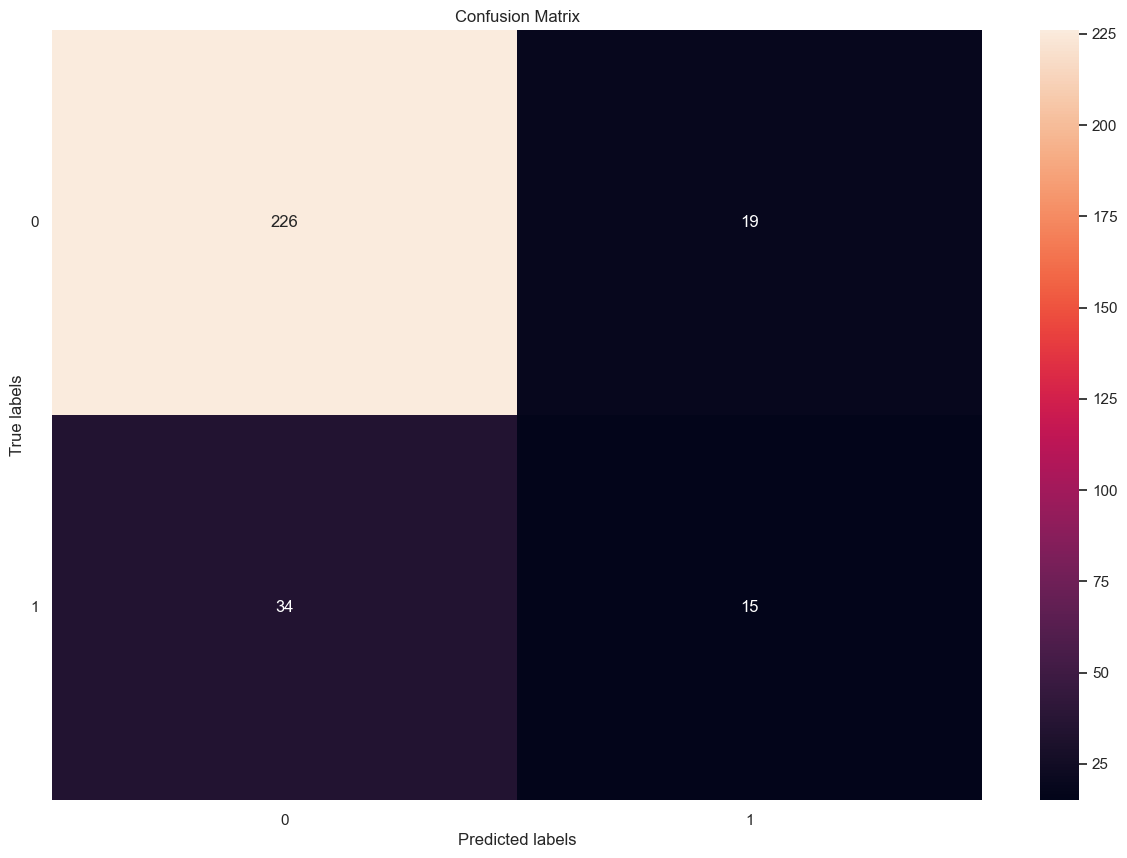

In [58]:
tree_cm = confusion_matrix(Y_val, tree_predictions)
ax = plt.subplot()
sns.heatmap(tree_cm, annot=True, ax = ax, fmt="d")
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)

In [64]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=0)
results = cross_val_score(knn_model, X_val, Y_val, cv=kfolds, scoring='accuracy')
print(results)
print("Baseline Accuracy: %.2f%%" % (results.mean()*100))

[0.9        0.83333333 0.8        0.9        0.75862069 0.82758621
 0.75862069 0.82758621 0.79310345 0.93103448]
Baseline Accuracy: 83.30%


The model performs well in terms of accuracy (83.3%) on a 10-fold cross validation created from the same data - thus it suggests that the model is expected to perform with about 83.3% effectiveness on unseen data, assuming the data is representative of the same population. 

# Conclusion

All in all, I utilised machine learning to predict the attrition of employees in IBM. This can be useful for internal use as it can be used to inform decision making on projects and the setting of realistic deliverables for various departments within IBM. The insights derived from the analysis can also be used to inform IBM's compensation packages and their company policies such that they can remain competitive when hiring candidates and retaining talent. 

As the approach taken towards this project revolves mainly around the dataset as my current understanding of many models is limited, I would like to focus more on the machine learning models in future projects once I have gained a deeper appreciation for the various models that we can employ.